
# Transformers - Attention is all you need

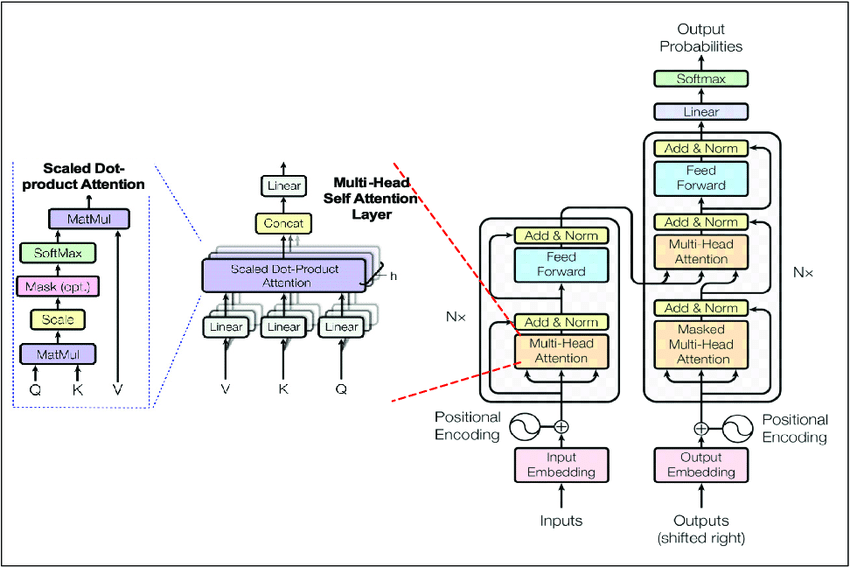

## Coding the Positional Encoding Matrix from Scratch

In [1]:
#######################################  General Intro and sample codes.  ###################################################

#### Position Encoding Layer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Positional encoding describes the location or position of an entity in a sequence so that each position is assigned a unique representation. There are many reasons why a single number, such as the index value, is not used to represent an item’s position in transformer models. For long sequences, the indices can grow large in magnitude. If you normalize the index value to lie between 0 and 1, it can create problems for variable length sequences as they would be normalized differently.

<div>
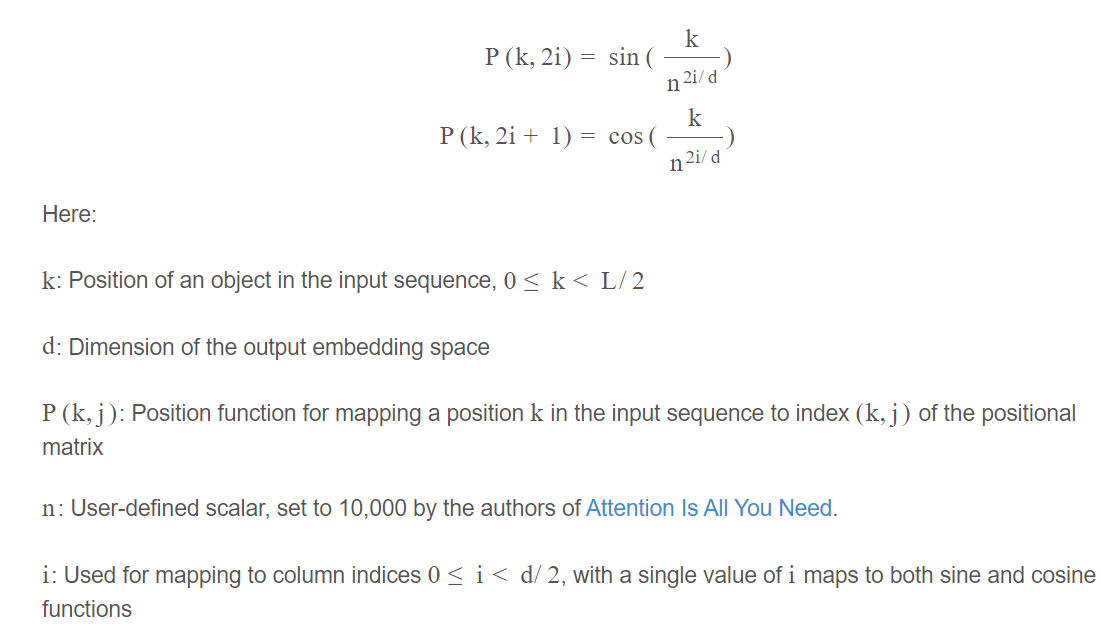
</div>

In [ ]:
<div>
<img src="attachment:pos_encoding_sine_wave.jpeg" width="600" align="left"/>
</div>



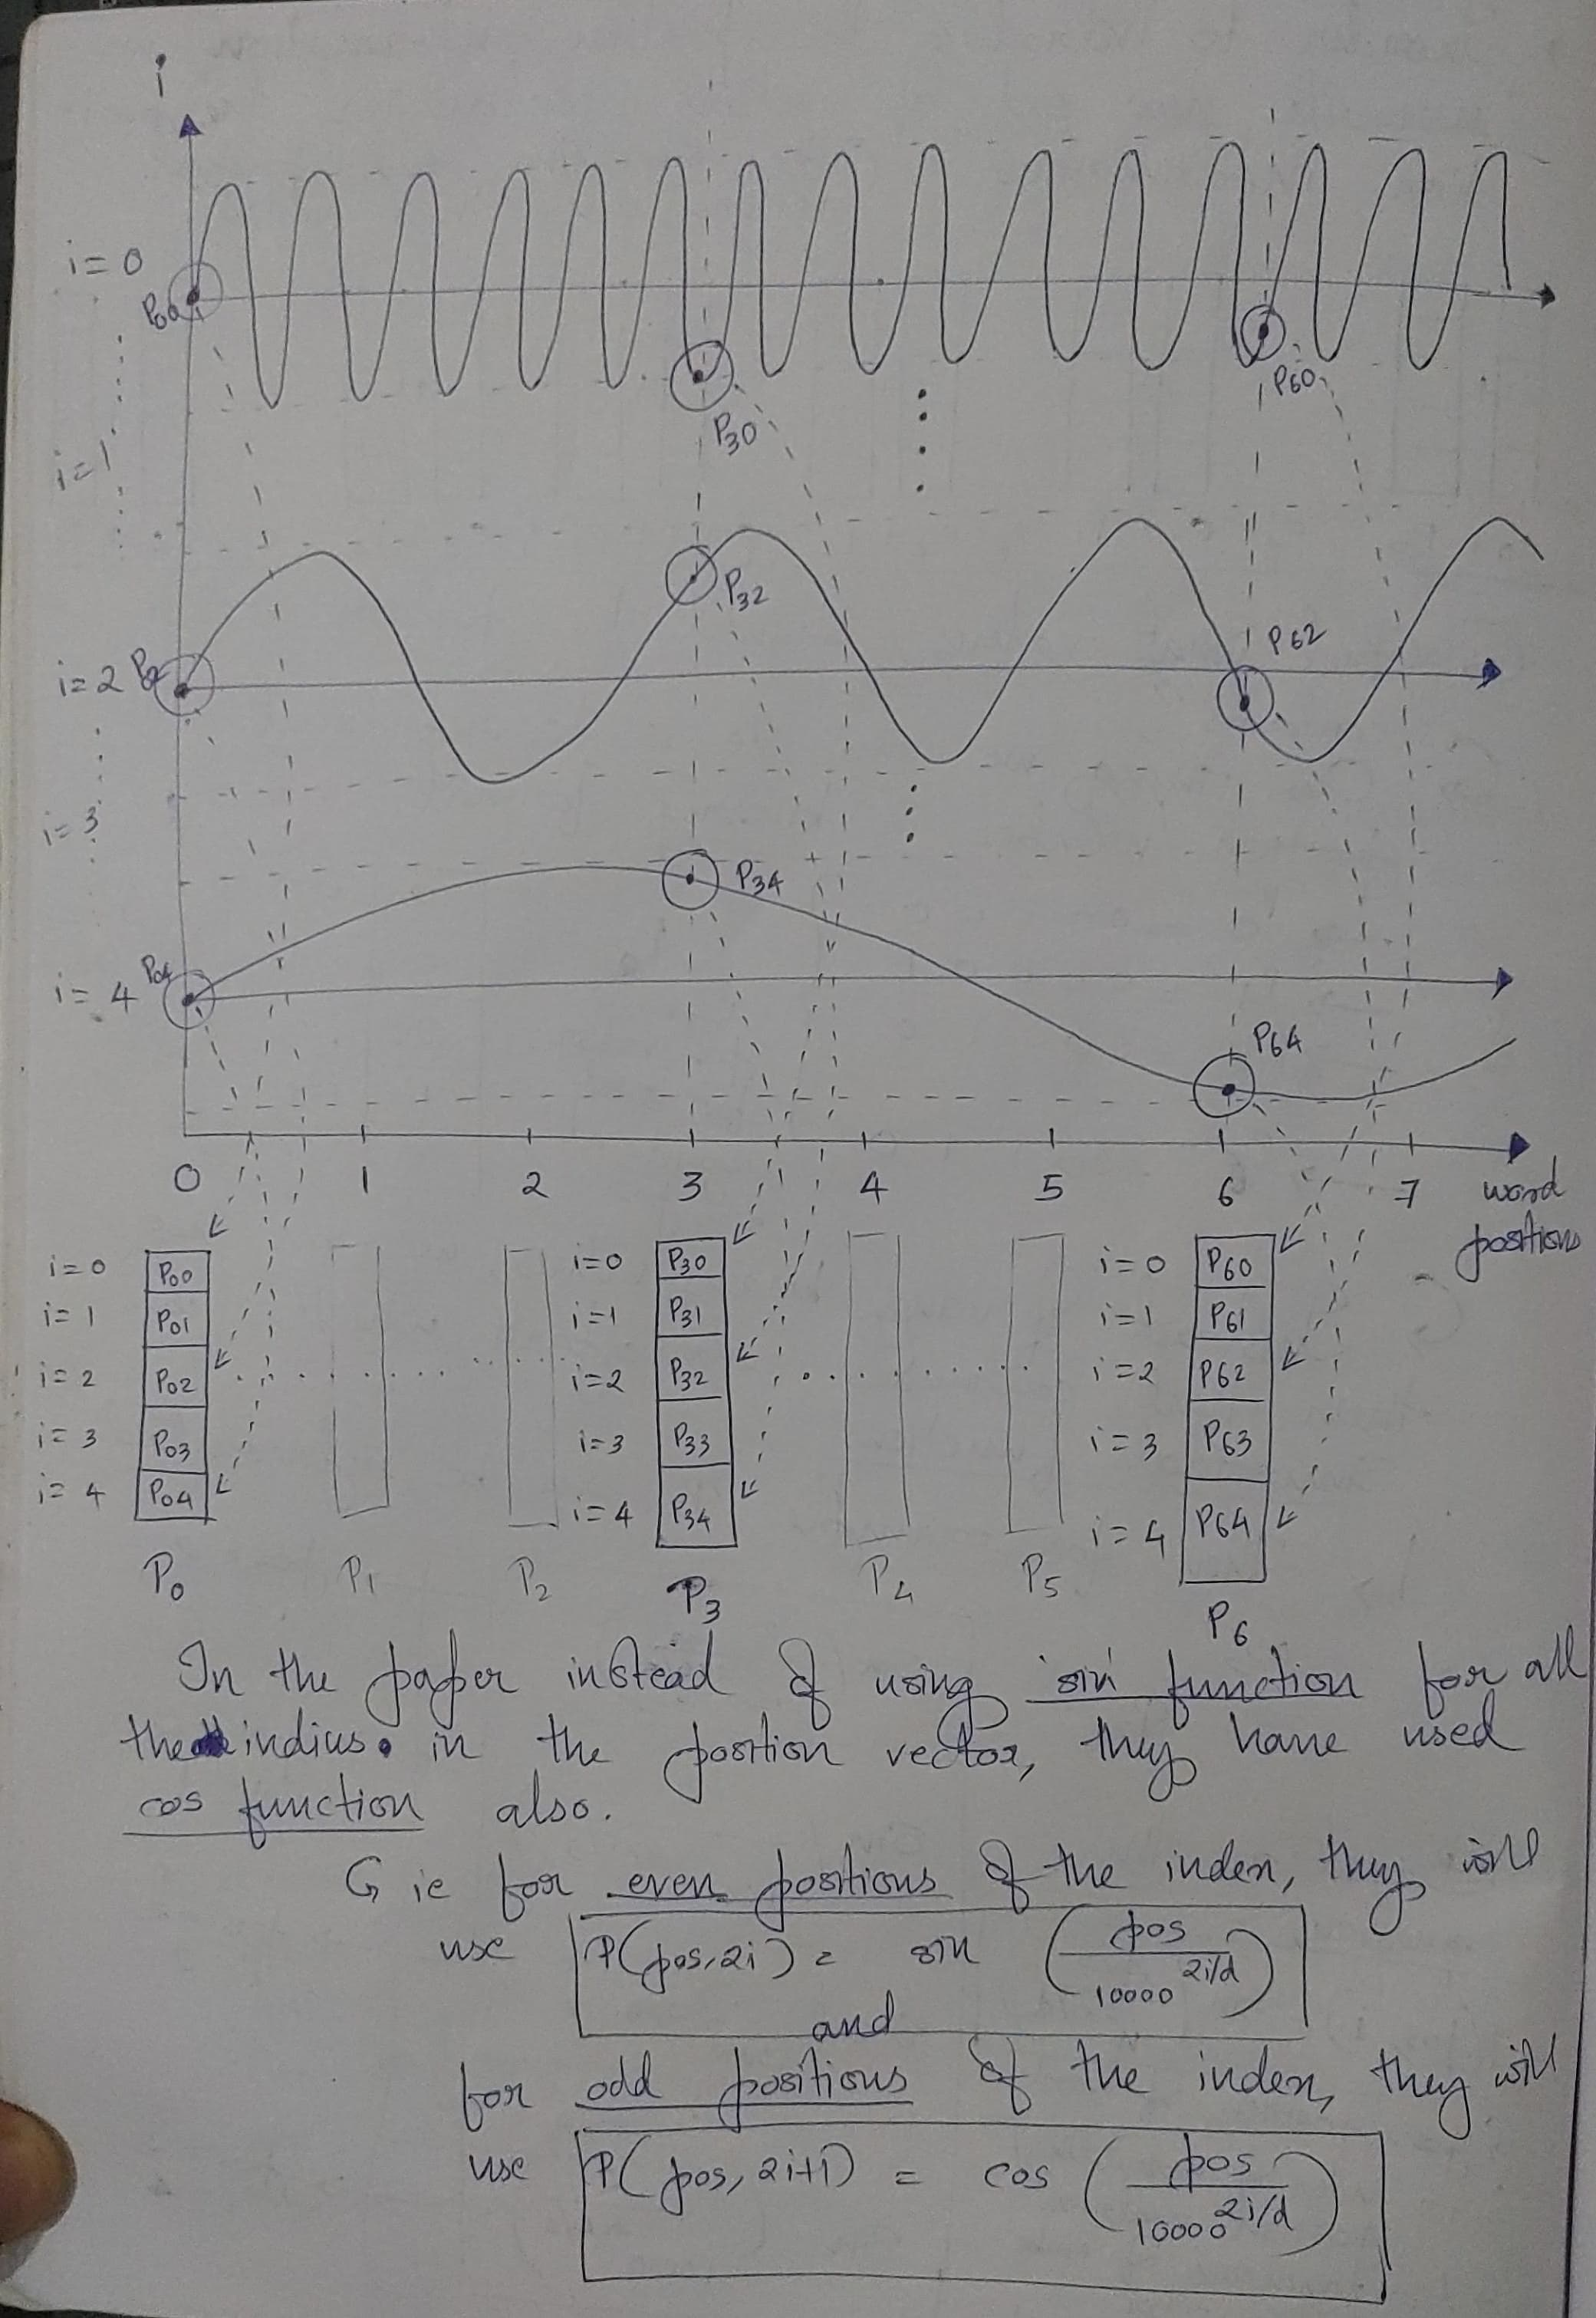

In [3]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P


In [4]:
 P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


#### Text Vectorization Layer

In [5]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [6]:
output_sequence_length = 4
vocab_size = 10

In [7]:
sentences = [["I am a robot"], ["you too robot"]]
sentence_data = Dataset.from_tensor_slices(sentences)

The text vectorization layer creates a dictionary of words and replaces each word with its corresponding index in the dictionary.

<div>
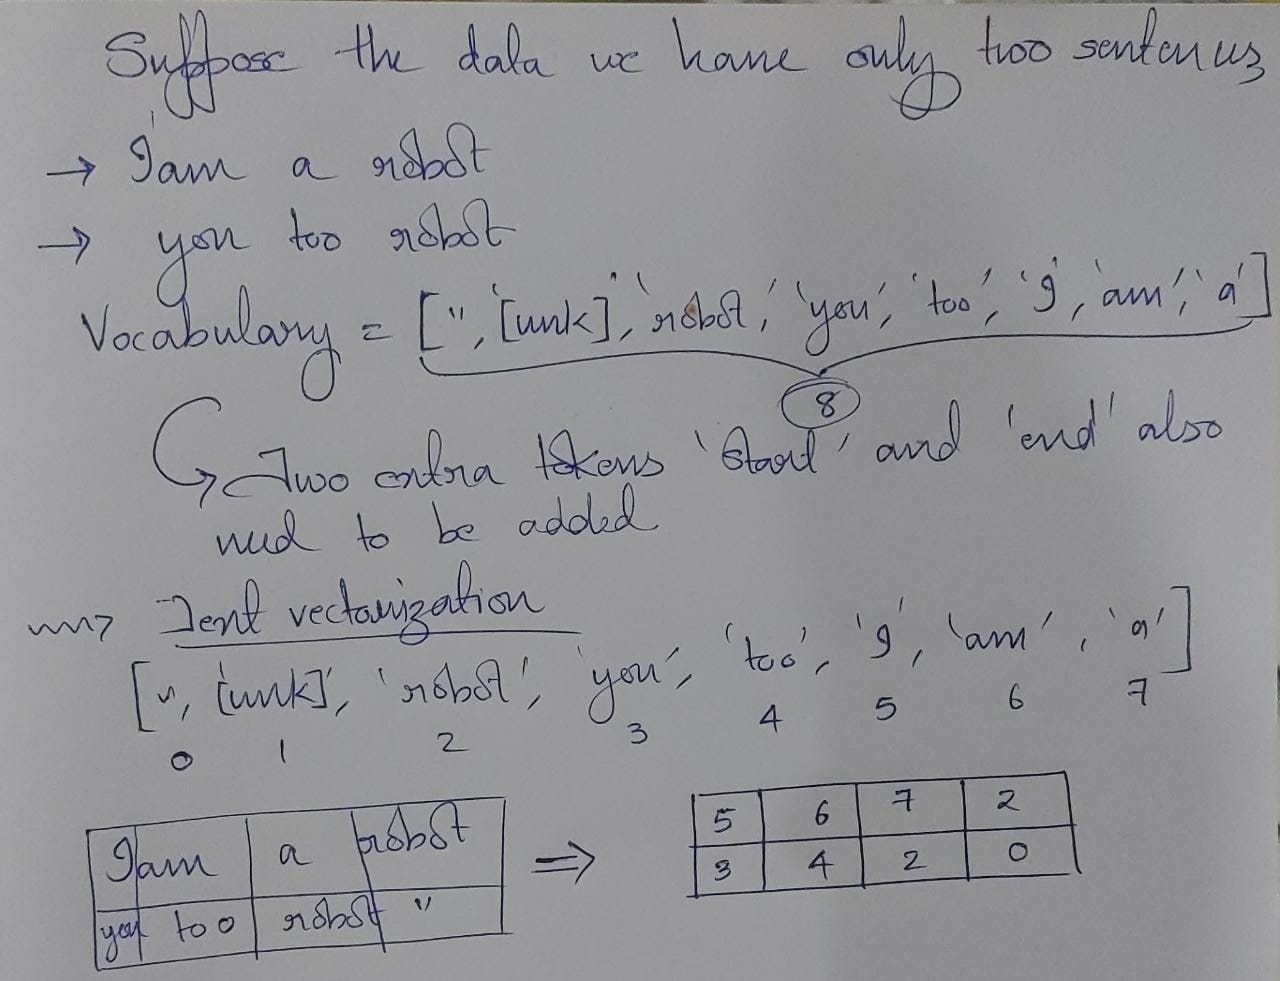
</div>

In [8]:
# Create the TextVectorization layer
vectorize_layer = TextVectorization(
                  output_sequence_length=output_sequence_length,
                  max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)
print("Vocabulary: ", vectorize_layer.get_vocabulary())
print("Vectorized words: ", vectorized_words)

Vocabulary:  ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
Vectorized words:  tf.Tensor(
[[5 6 7 2]
 [3 4 2 0]], shape=(2, 4), dtype=int64)


#### The Embedding Layer

The Keras Embedding layer converts integers to dense vectors. This layer maps these integers to random numbers, which are later tuned during the training phase. However, you also have the option to set the mapping to some predefined weight values . To initialize this layer, you need to specify the maximum value of an integer to map, along with the length of the output sequence.

In [9]:
output_length = 6
word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)
print(embedded_words)

tf.Tensor(
[[[-0.02673032  0.00587385 -0.01306052 -0.01342262 -0.04836359
    0.02977227]
  [ 0.03689878 -0.00714457 -0.00541744  0.045553   -0.01294173
    0.0349815 ]
  [ 0.03466401  0.03032348  0.00459757 -0.02195965  0.0084903
   -0.01733695]
  [ 0.02316084 -0.03958682 -0.01673264  0.02358786 -0.01555625
    0.0159703 ]]

 [[-0.01995465 -0.04018426 -0.04284459  0.02027733 -0.00481279
   -0.03247154]
  [-0.02037177  0.0401873   0.03971222  0.03412301 -0.02989069
    0.02726017]
  [ 0.02316084 -0.03958682 -0.01673264  0.02358786 -0.01555625
    0.0159703 ]
  [-0.04749534 -0.01981959 -0.00427476 -0.03235817  0.00418601
   -0.02095062]]], shape=(2, 4, 6), dtype=float32)



<div>
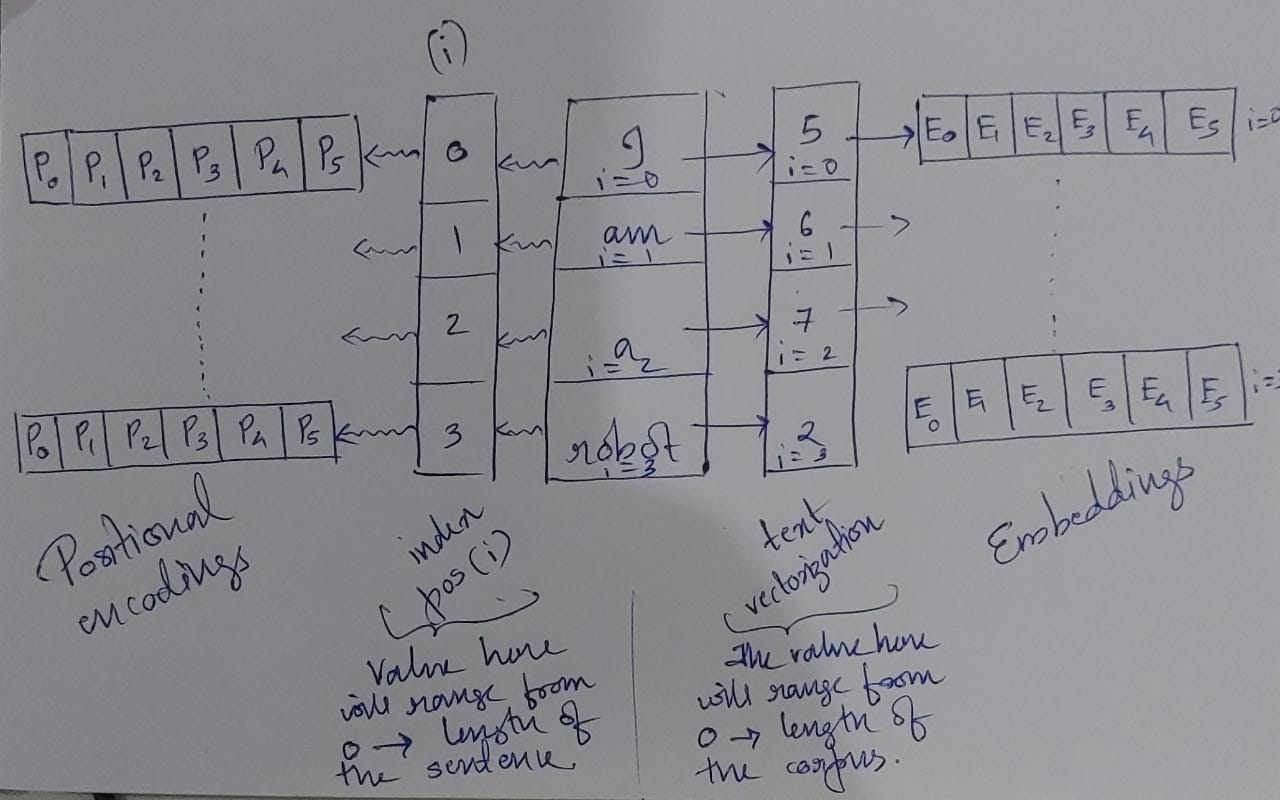
</div>

#### The Position Embeddings

In [10]:
position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)   #output_sequence_length = 4 , output_length = 6
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices) 

tf.Tensor(
[[ 0.03329594  0.00850905  0.00408977  0.02844175 -0.04816257 -0.03973224]
 [ 0.03742408  0.00256022 -0.01150992  0.00709678 -0.03034034  0.04242996]
 [ 0.02541465 -0.01331829  0.03083119 -0.01807984 -0.01991942 -0.00794885]
 [-0.0454826  -0.04298946  0.04788015 -0.04092197  0.02907032  0.03065779]], shape=(4, 6), dtype=float32)


#### The Output of Positional Encoding Layer in Transformers


<div>
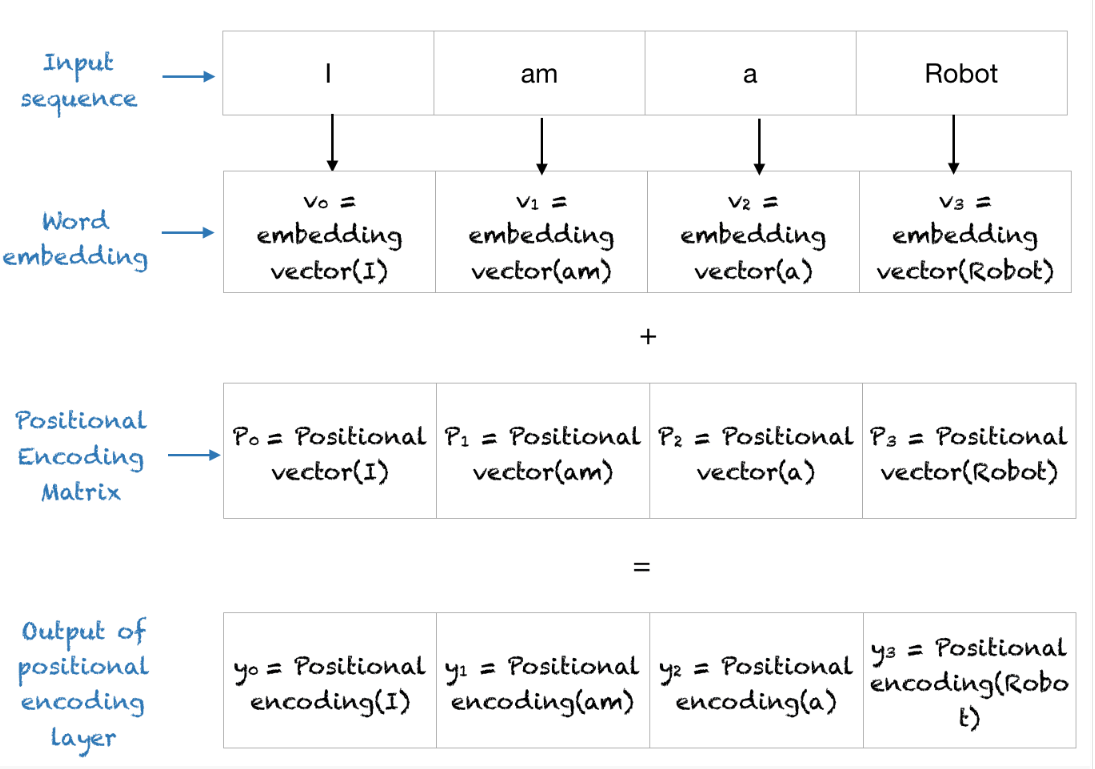
</div>

In [11]:
final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[ 0.00656562  0.0143829  -0.00897075  0.01501913 -0.09652616
   -0.00995997]
  [ 0.07432286 -0.00458435 -0.01692736  0.05264978 -0.04328207
    0.07741146]
  [ 0.06007866  0.01700519  0.03542876 -0.04003949 -0.01142912
   -0.02528581]
  [-0.02232176 -0.08257627  0.0311475  -0.01733412  0.01351407
    0.0466281 ]]

 [[ 0.01334129 -0.03167521 -0.03875482  0.04871909 -0.05297536
   -0.07220378]
  [ 0.01705231  0.04274752  0.02820231  0.04121979 -0.06023103
    0.06969013]
  [ 0.04857549 -0.05290511  0.01409855  0.00550802 -0.03547567
    0.00802145]
  [-0.09297794 -0.06280905  0.04360538 -0.07328014  0.03325633
    0.00970718]]], shape=(2, 4, 6), dtype=float32)


In [12]:
#################################################################################################################

### Positional Encoding In Transformers :Attention Is All You Need


<div>
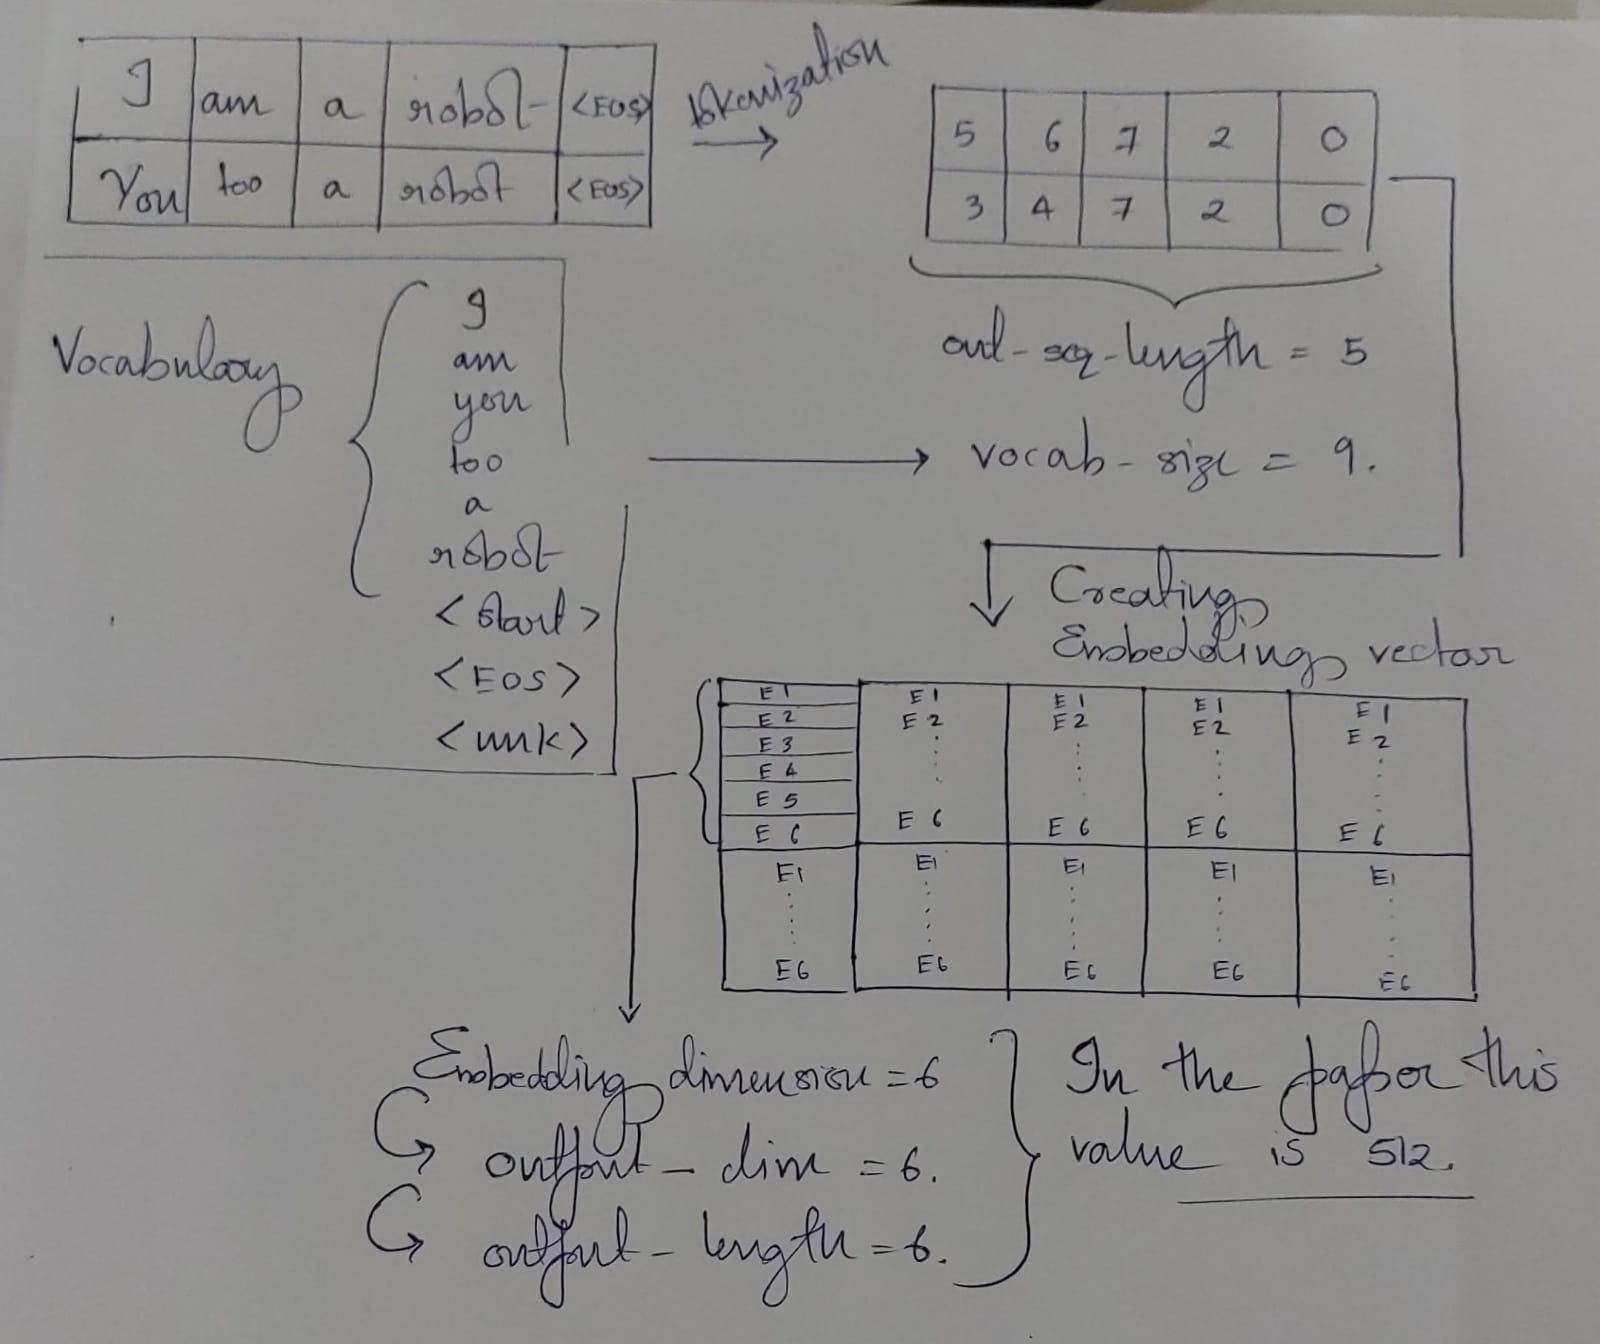
</div>



In [13]:
class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super(PositionEmbeddingFixedWeights, self).__init__(**kwargs)
        
        position_embedding_matrix = self.get_position_encoding(sequence_length, output_dim) 
        
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim)    # This is trainable  # output_dim=output_dim = 512
        
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim,
            weights=[position_embedding_matrix],
            trainable=False)  # This is non trainable
             
    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P
 
 
    def call(self, inputs):        
        position_indices = tf.range(tf.shape(inputs)[-1])  #length of sentence (this is variable sentence)
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [14]:
vectorized_words

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[5, 6, 7, 2],
       [3, 4, 2, 0]], dtype=int64)>

In [15]:
tf.range(tf.shape(vectorized_words)[-1])

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 3])>

In [16]:
attnisallyouneed_embedding = PositionEmbeddingFixedWeights(output_sequence_length,
                                            vocab_size, output_length)
attnisallyouneed_output = attnisallyouneed_embedding(vectorized_words)
print("Output from my_embedded_layer: ", attnisallyouneed_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.04275464  1.0125145   0.0303448   1.024178    0.02529687
    0.9713309 ]
  [ 0.86733216  0.57111233  0.01261835  0.96656364 -0.03208189
    0.96189123]
  [ 0.8745343  -0.42815754  0.08053083  1.0430402   0.00638626
    1.0444084 ]
  [ 0.12900072 -0.9739753   0.16774882  1.013776   -0.03650055
    0.99972165]]

 [[-0.01979499  1.0178686   0.01052549  0.9896593  -0.04261011
    1.0198965 ]
  [ 0.8501696   0.51304126  0.06181996  0.98057204 -0.02727227
    1.0353136 ]
  [ 0.8971781  -0.40012965  0.12164922  1.0191495  -0.03865496
    0.9997332 ]
  [ 0.16091663 -1.011603    0.09289515  1.0258819  -0.00598745
    1.0114412 ]]], shape=(2, 4, 6), dtype=float32)


## Coding for Scaled Dot-Product Attention from Scratch

<div>
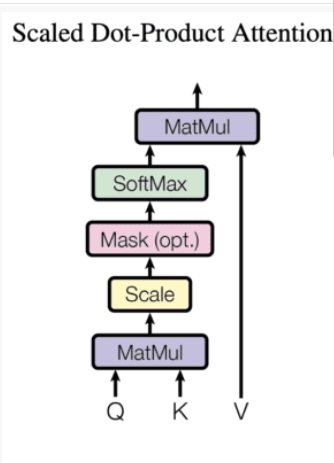
</div>

You may note that the scaled dot-product attention can also apply a mask to the attention scores before feeding them into the softmax function. 

Since the word embeddings are zero-padded to a specific sequence length, a padding mask needs to be introduced in order to prevent the zero tokens from being processed along with the input in both the encoder and decoder stages. Furthermore, a look-ahead mask is also required to prevent the decoder from attending to succeeding words, such that the prediction for a particular word can only depend on known outputs for the words that come before it.

These look-ahead and padding masks are applied inside the scaled dot-product attention. Set to "-infinity"
 all the values in the input to the softmax function that should not be considered. For each of these large negative inputs, the softmax function will, in turn, produce an output value that is close to zero, effectively masking them out.
 
The mask will contain either 0 values to indicate that the corresponding token in the input sequence should be considered in the computations or a 1 to indicate otherwise. The mask will be multiplied by -1e9 to set the 1 values to large negative numbers

In [17]:
from tensorflow import matmul, math, cast, float32
from tensorflow.keras.layers import Layer
from keras.backend import softmax
from numpy import random

In [18]:
# Implementing the Scaled-Dot Product Attention
class DotProductAttention(Layer):
    def __init__(self, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
 
    def call(self, queries, keys, values, d_k, mask=None):
        # Scoring the queries against the keys after transposing the latter, and scaling
        scores = matmul(queries, keys, transpose_b=True) / math.sqrt(cast(d_k, float32))
 
        # Apply mask to the attention scores
        if mask is not None:
            scores += -1e9 * mask   
 
        # Computing the weights by a softmax operation
        weights = softmax(scores)
 
        # Computing the attention by a weighted sum of the value vectors
        return matmul(weights, values)

In [19]:
input_seq_length = 5  # Maximum length of the input sequence
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
batch_size = 64  # Batch size from the training process

from 512 the embeddeing dimension is redused to 64 after passing through a linear layer

<div>
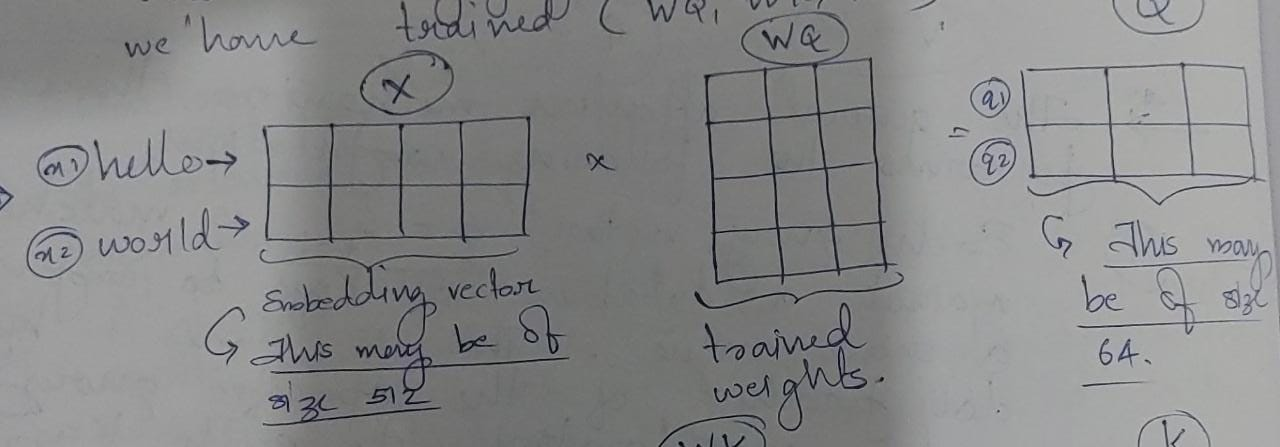
</div>

In [20]:
queries = random.random((batch_size, input_seq_length, d_k))
keys = random.random((batch_size, input_seq_length, d_k))
values = random.random((batch_size, input_seq_length, d_v))
 
attention = DotProductAttention()
print(attention(queries, keys, values, d_k))

tf.Tensor(
[[[0.5752604  0.37880608 0.6313668  ... 0.5755961  0.51542854 0.6716595 ]
  [0.5726253  0.36927465 0.6374187  ... 0.5798302  0.52216285 0.66521   ]
  [0.57449055 0.39192775 0.6287353  ... 0.55343646 0.53036547 0.6736161 ]
  [0.5572837  0.3741138  0.6489274  ... 0.57079697 0.5329546  0.67516035]
  [0.5549817  0.376988   0.64900696 ... 0.5722394  0.5260232  0.68149465]]

 [[0.3693694  0.5767147  0.24238247 ... 0.48821574 0.3709822  0.3626352 ]
  [0.36463526 0.55952823 0.24657108 ... 0.49527097 0.36242756 0.35162818]
  [0.36794513 0.55089355 0.24375272 ... 0.49930972 0.35232228 0.35945466]
  [0.37599665 0.554862   0.24204892 ... 0.49837548 0.3476015  0.36663377]
  [0.36304706 0.54162234 0.24379599 ... 0.49985647 0.34502062 0.35577998]]

 [[0.47861326 0.50285256 0.688313   ... 0.3668043  0.3939466  0.48774344]
  [0.49278602 0.5054064  0.7033753  ... 0.3662243  0.37784028 0.4860251 ]
  [0.5263251  0.48878276 0.69376194 ... 0.3907791  0.3876419  0.4763022 ]
  [0.50784045 0.4936189

## Transformer Multi-head Attention


<div>
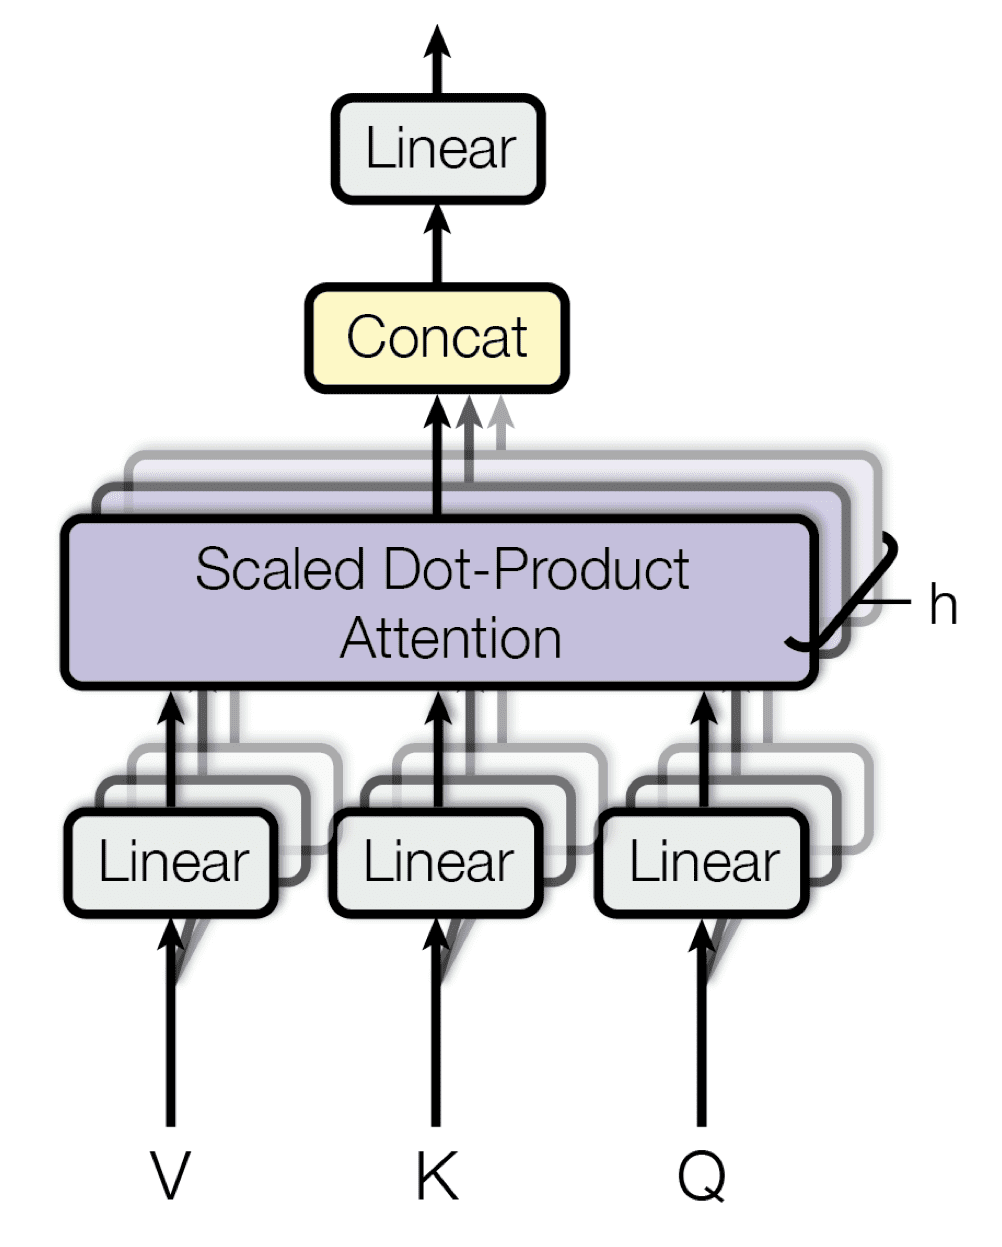
</div>

<div>
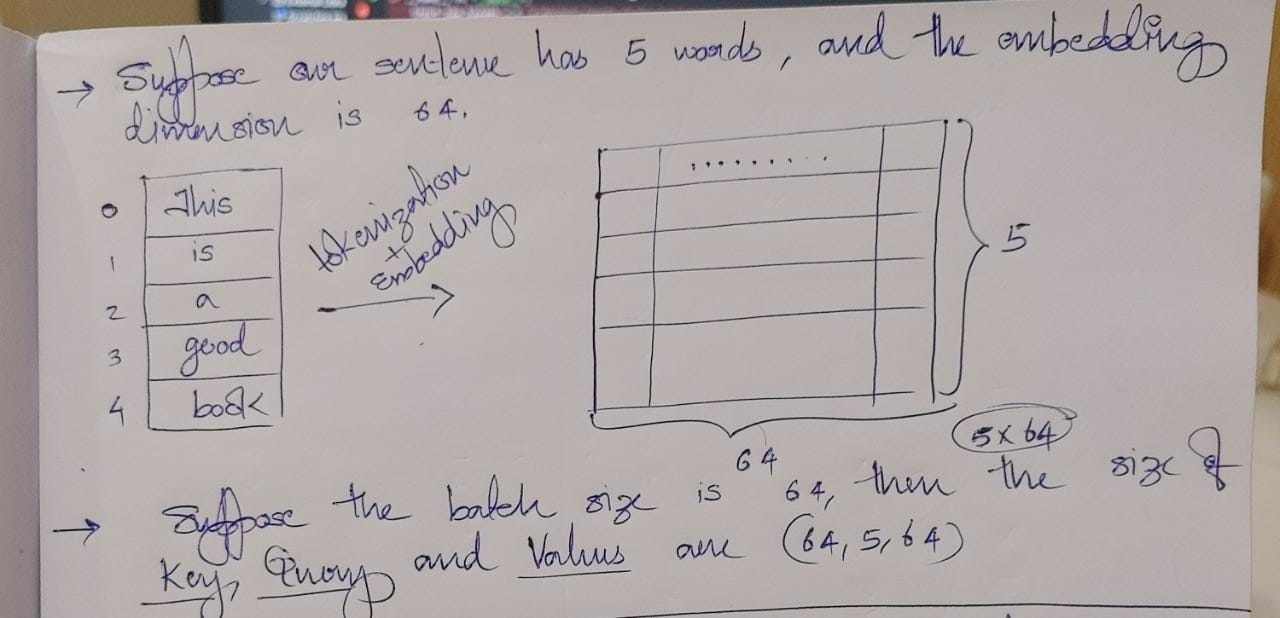
</div>


<div>
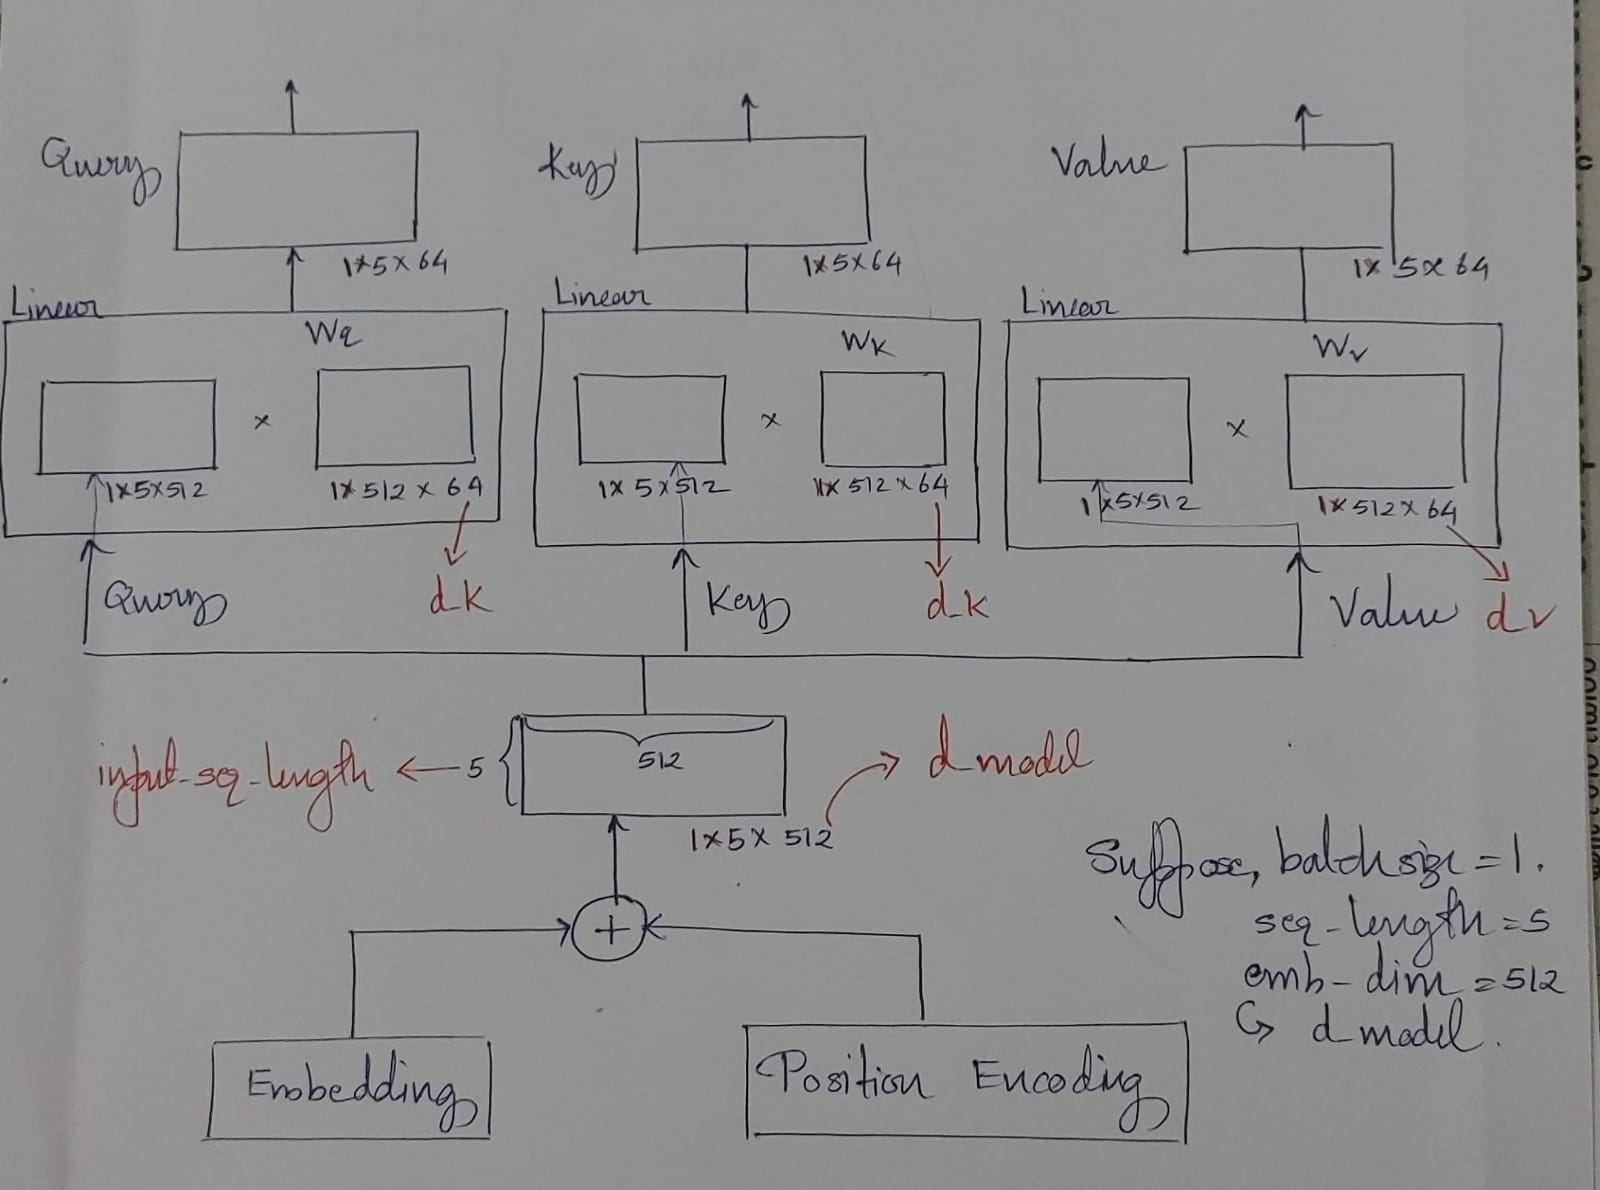
</div>


<div>
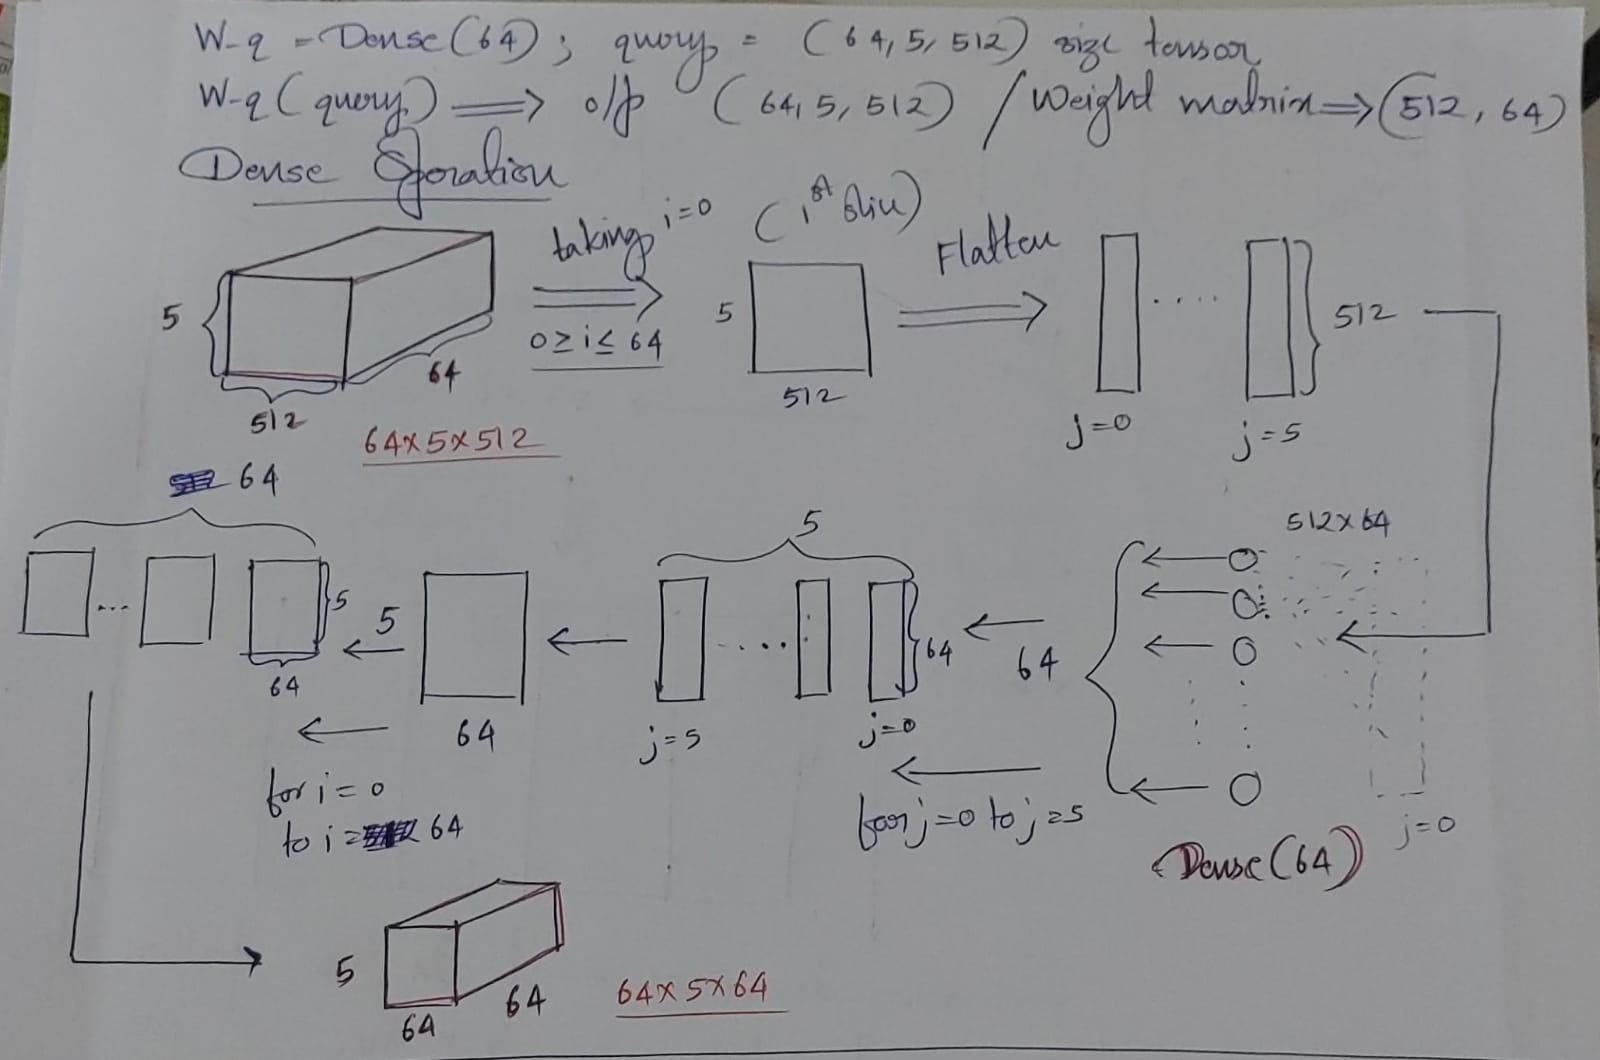
</div>


The queries, keys, and values will be fed as input into the multi-head attention block having a shape of (batch size, sequence length, model dimensionality), where the batch size is a hyperparameter of the training process, the sequence length defines the maximum length of the input/output phrases, and the model dimensionality is the dimensionality of the outputs produced by all sub-layers of the model. They are then passed through the respective dense layer to be linearly projected to a shape of (batch size, sequence length, queries/keys/values dimensionality).

The linearly projected queries, keys, and values will be rearranged into (batch size, number of heads, sequence length, depth), by first reshaping them into (batch size, sequence length, number of heads, depth) and then transposing the second and third dimensions.

Reshape the linearly projected queries, keys, and values in such a manner as to allow the attention heads to be computed in parallel.We will split the query,key and value into 8 slices and will give each slice to each attention head in Encoder.Each slice will be of size (64,5,8) and there are 8 slices. Since we are using matrix multiplication the output is calculated in parallel in Attention layer.


<div>
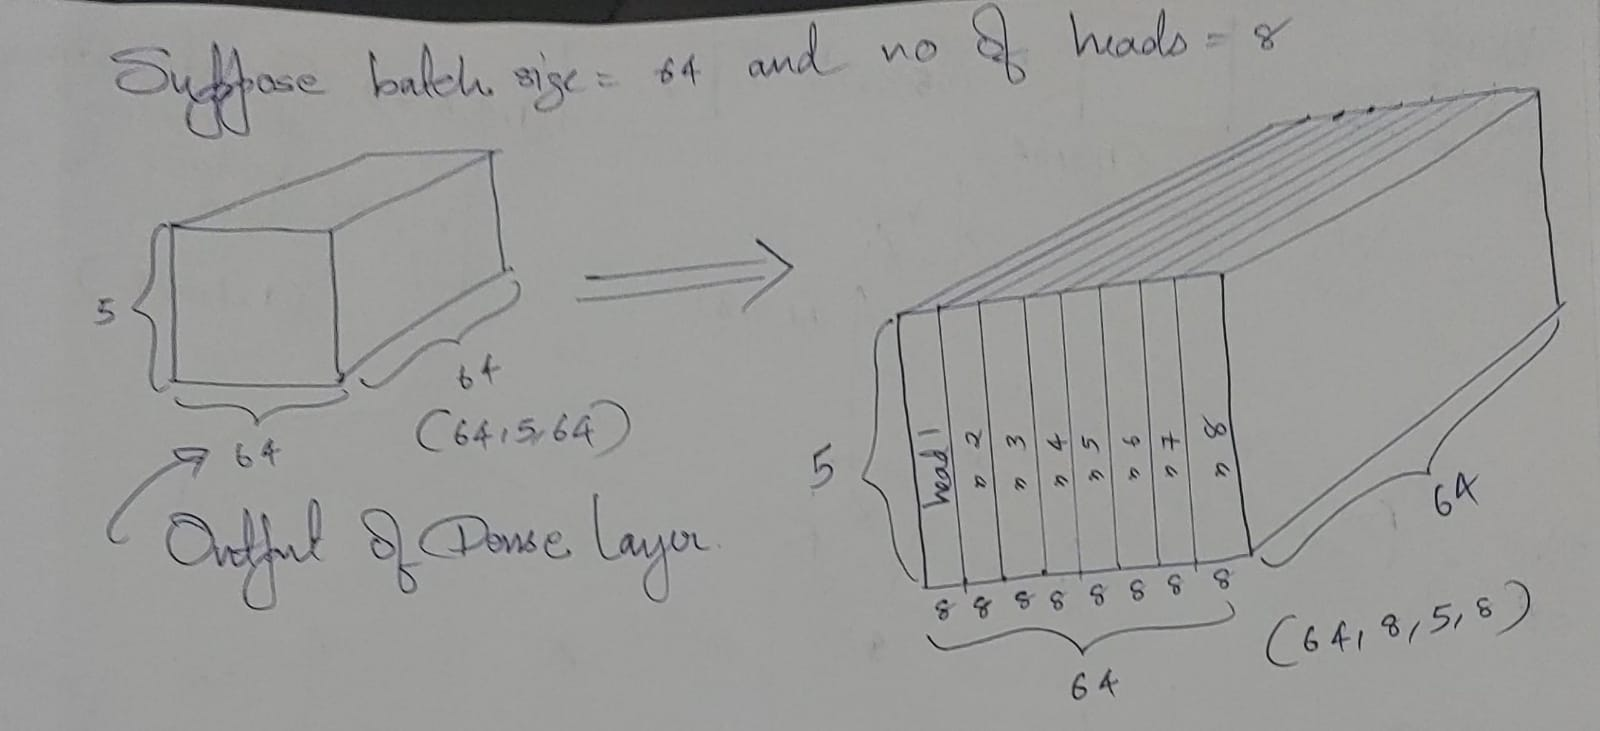
</div>


The last Linear layer will convert 64 dimension to 512

<div>
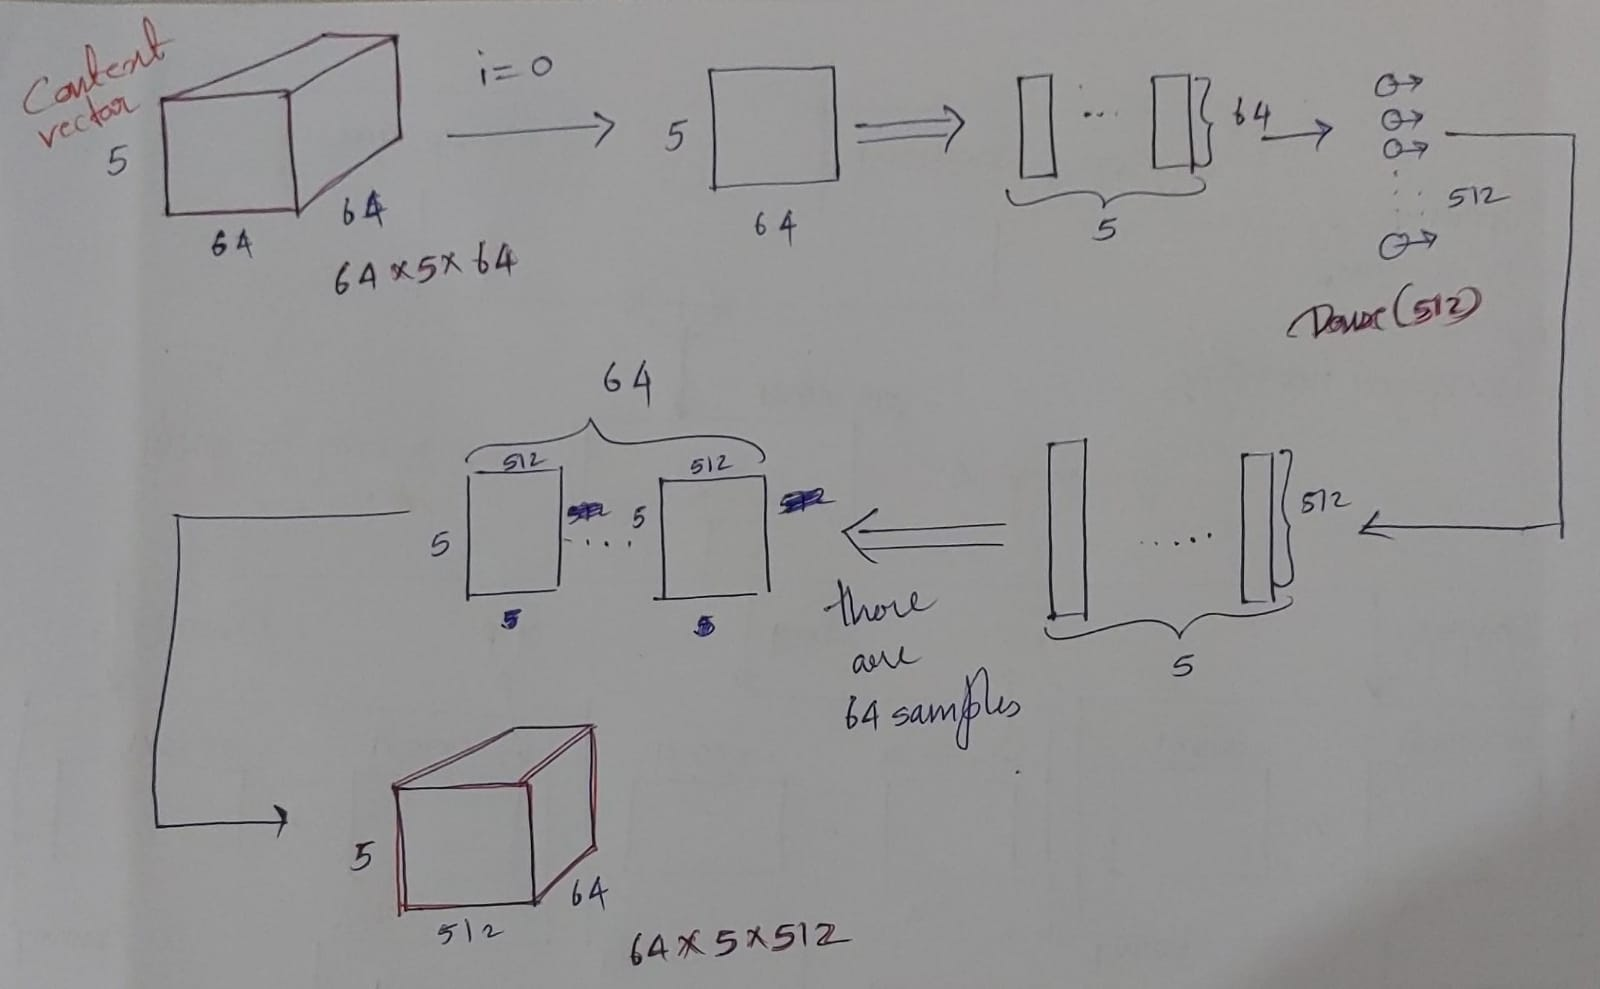
</div>


In [21]:
from tensorflow import math, matmul, reshape, shape, transpose, cast, float32
from tensorflow.keras.layers import Dense, Layer
from keras.backend import softmax

# Implementing the Scaled-Dot Product Attention
class DotProductAttention(Layer):
    def __init__(self, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)

    def call(self, queries, keys, values, d_k, mask=None): #input shapes : [64, 8, 5, 8],[64, 8, 5, 8],[64, 8, 5, 8]
        # Scoring the queries against the keys after transposing the latter, and scaling
        #the transpose of [64, 8, 5, 8] is [8, 8, 5, 64].
        scores = matmul(queries, keys, transpose_b=True) / math.sqrt(cast(d_k, float32))  #Value is transposed  # out shape : [64, 5, 8, 8]

        # Apply mask to the attention scores
        if mask is not None:
            scores += -1e9 * mask

        # Computing the weights by a softmax operation
        weights = softmax(scores)

        # Computing the attention by a weighted sum of the value vectors
        return matmul(weights, values) # out shape : [64, 8, 5, 8]

# Implementing the Multi-Head Attention
class MultiHeadAttention(Layer):
    def __init__(self, h, d_k, d_v, d_model, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.attention = DotProductAttention()  # Scaled dot product attention
        self.heads = h  # Number of attention heads to use
        self.d_k = d_k  # Dimensionality of the linearly projected queries and keys
        self.d_v = d_v  # Dimensionality of the linearly projected values
        self.d_model = d_model  # Dimensionality of the model
        self.W_q = Dense(d_k)  # Learned projection matrix for the queries
        self.W_k = Dense(d_k)  # Learned projection matrix for the keys
        self.W_v = Dense(d_v)  # Learned projection matrix for the values
        self.W_o = Dense(d_model)  # Learned projection matrix for the multi-head output

    def reshape_tensor(self, x, heads, flag):  #input size initially (64,5,64)
        if flag:
            # Tensor shape after reshaping and transposing: (batch_size, heads, seq_length, -1)
            # If one component of shape is the special value -1, the size of that dimension is computed so that the total size remains constant.
            x = reshape(x, shape=(shape(x)[0], shape(x)[1], heads, -1))  # changed shape to [64, 5, 8, 8]
            x = transpose(x, perm=(0, 2, 1, 3)) # changes=d shape to [64, 8, 5, 8]
        else:
            # Reverting the reshaping and transposing operations: (batch_size, seq_length, d_k)
            x = transpose(x, perm=(0, 2, 1, 3)) # size : [64,8,5,8]
            x = reshape(x, shape=(shape(x)[0], shape(x)[1], self.d_k))  # size [64,5,64]
        return x

    def call(self, queries, keys, values, mask=None): #(64, 5, 64),(64, 5, 64),(64, 5, 64)
        # Rearrange the queries to be able to compute all heads in parallel
        #self.W_q(queries) is of shape : [64, 5, 64]
        q_reshaped = self.reshape_tensor(self.W_q(queries), self.heads, True)   # out shape [64, 8, 5, 8]
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)

        # Rearrange the keys to be able to compute all heads in parallel
        k_reshaped = self.reshape_tensor(self.W_k(keys), self.heads, True)  # out shape [64, 8, 5, 8]
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)

        # Rearrange the values to be able to compute all heads in parallel
        v_reshaped = self.reshape_tensor(self.W_v(values), self.heads, True)  # out shape [64, 8, 5, 8]
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)

        # Compute the multi-head attention output using the reshaped queries, keys and values
        o_reshaped = self.attention(q_reshaped, k_reshaped, v_reshaped, self.d_k, mask) # out shape [64,8,5,8]
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)

        # Rearrange back the output into concatenated form
        output = self.reshape_tensor(o_reshaped, self.heads, False) # out shape [64,5,64]
        # Resulting tensor shape: (batch_size, input_seq_length, d_v)

        # Apply one final linear projection to the output to generate the multi-head attention
        # Resulting tensor shape: (batch_size, input_seq_length, d_model)
        return self.W_o(output)   # out shape (64, 5, 512)

### Scaled Dot Product Attention FlowChart


<div>
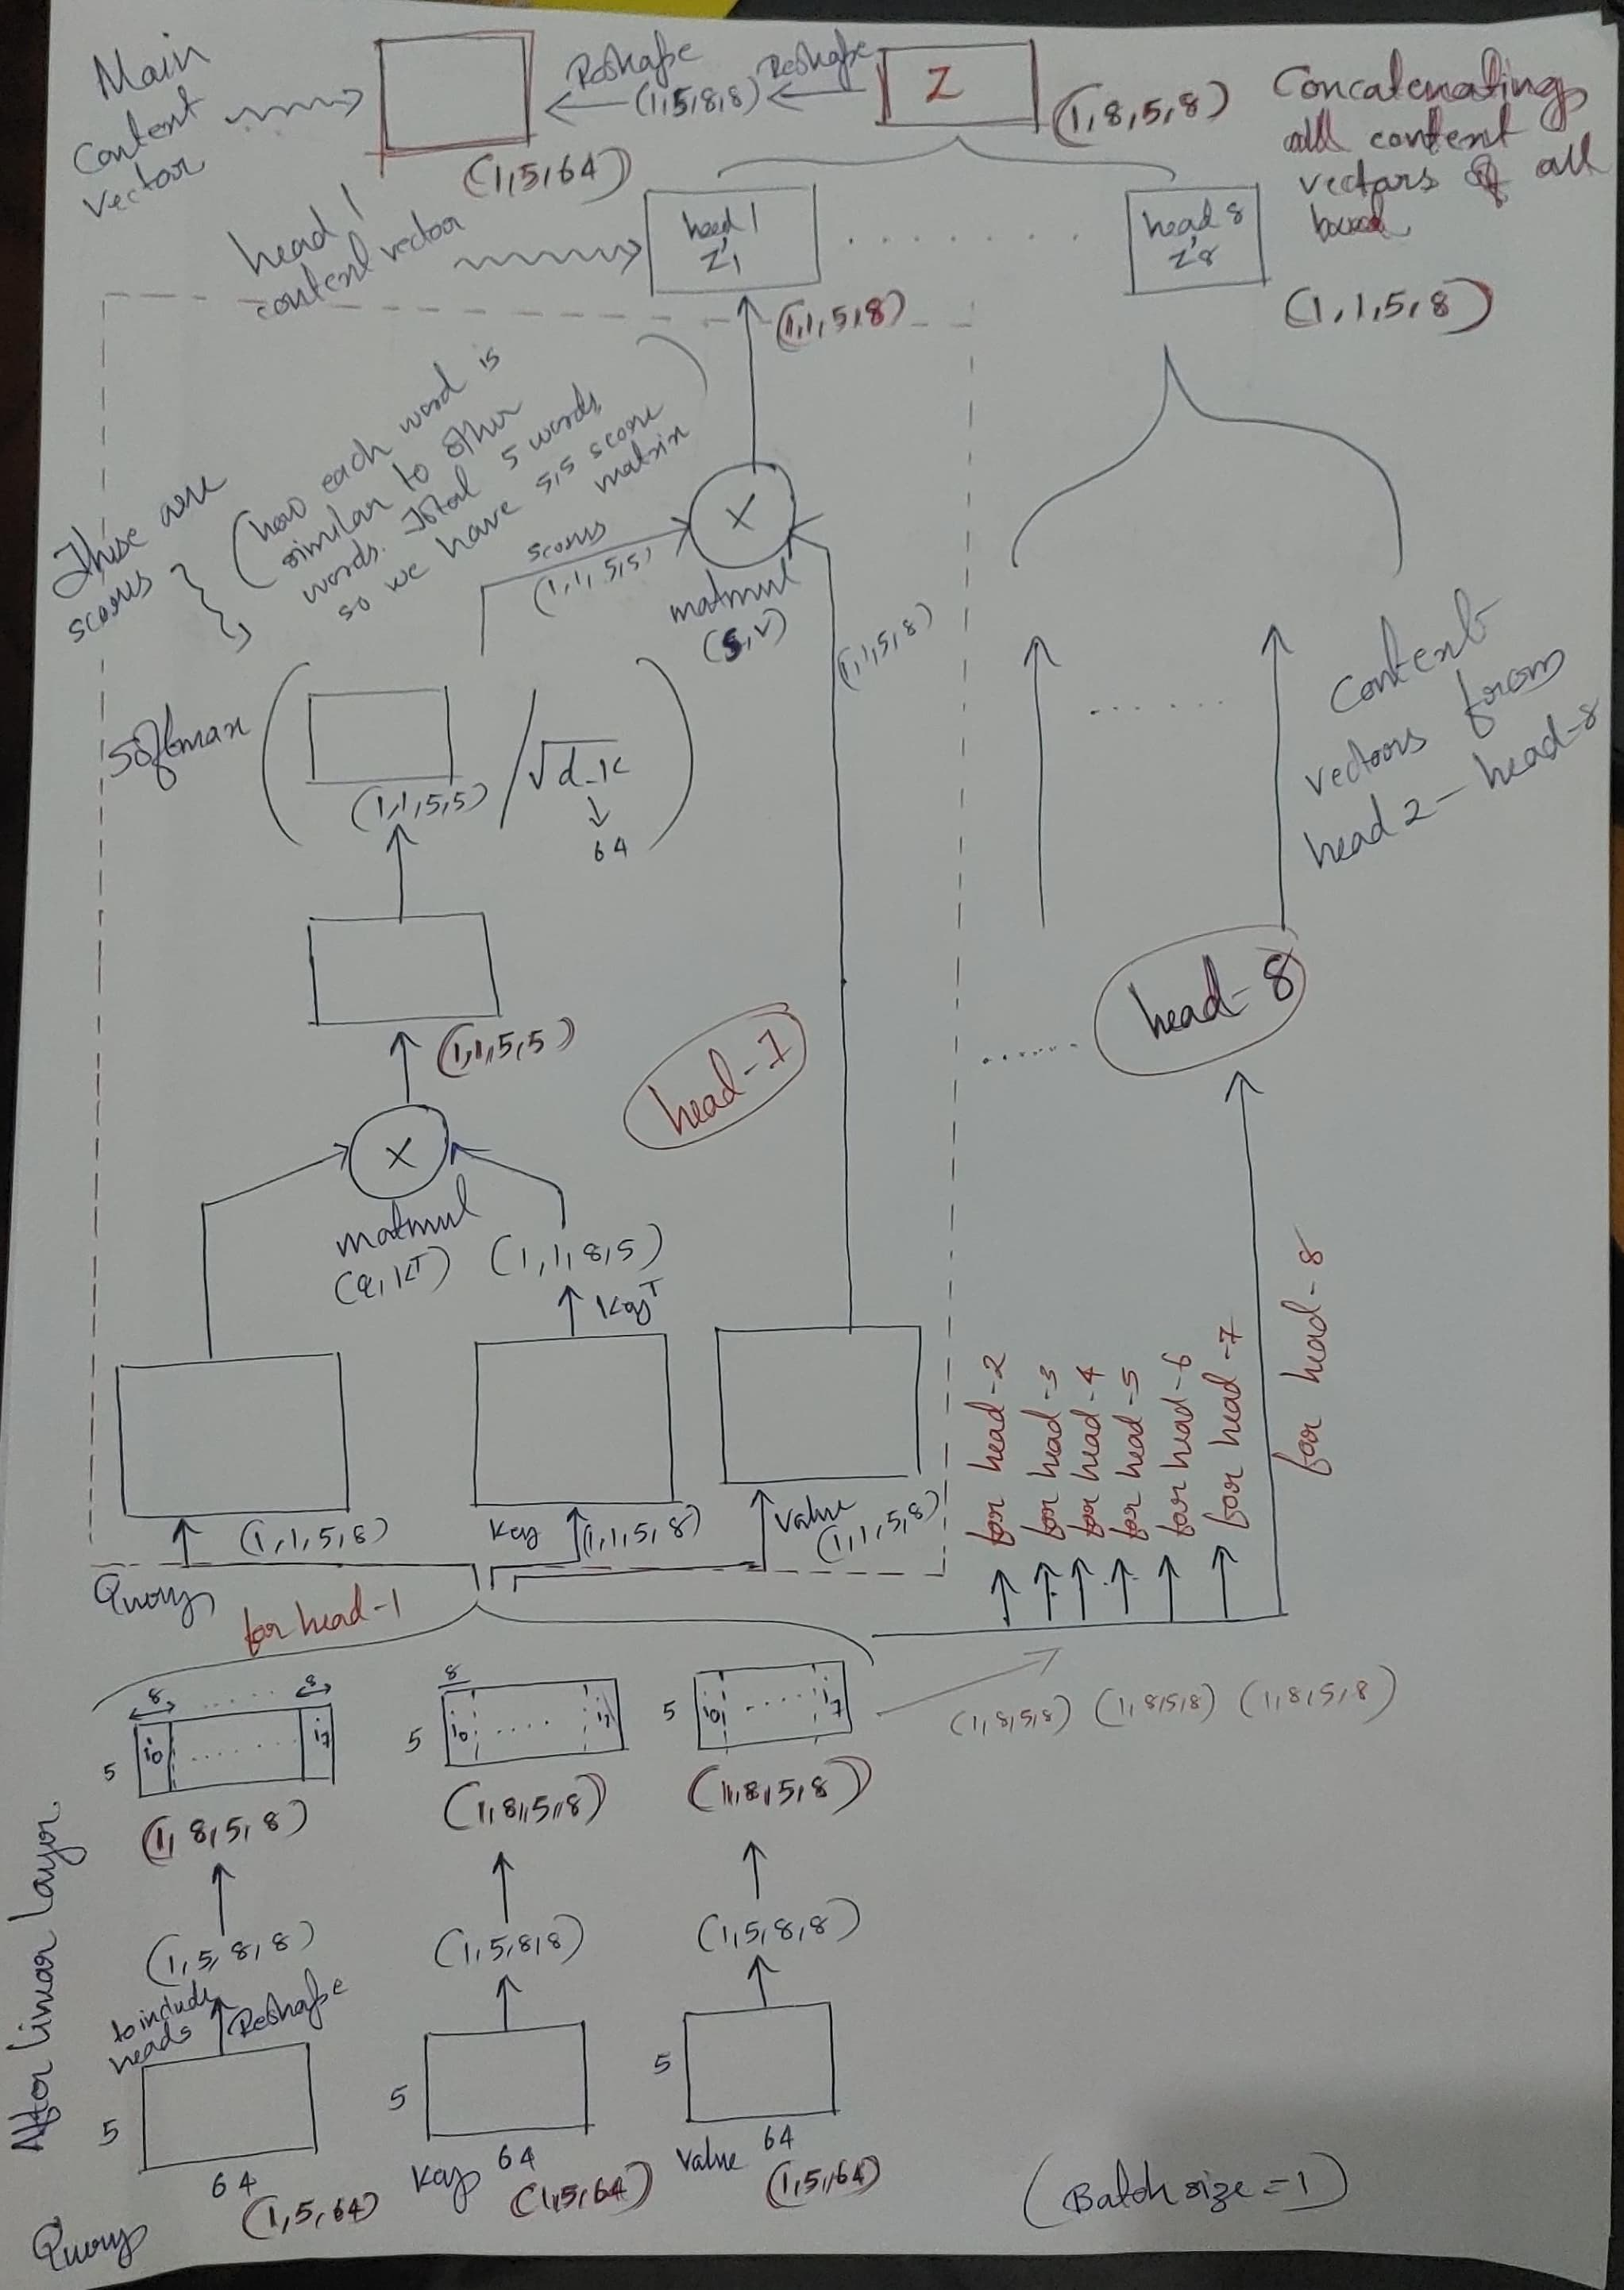
</div>


In [22]:
input_seq_length = 5  # Maximum length of the input sequence
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of the model sub-layers' outputs
batch_size = 64  # Batch size from the training process

In [23]:
queries = random.random((batch_size, input_seq_length, d_k))  #shape : (64, 5, 64) 
keys = random.random((batch_size, input_seq_length, d_k))     #shape : (64, 5, 64)
values = random.random((batch_size, input_seq_length, d_v))   #shape : (64, 5, 64)

In [24]:
multihead_attention = MultiHeadAttention(h, d_k, d_v, d_model)
print(multihead_attention(queries, keys, values))

tf.Tensor(
[[[-0.72325987  0.04499663 -0.14388369 ... -0.18613912 -0.1090939
   -0.29031155]
  [-0.7213166   0.04385656 -0.1411621  ... -0.18508035 -0.11326505
   -0.2919389 ]
  [-0.725661    0.04429314 -0.14188945 ... -0.18848723 -0.10846874
   -0.29001772]
  [-0.72442037  0.04452967 -0.14179239 ... -0.18860297 -0.11262888
   -0.28763437]
  [-0.72180116  0.04594251 -0.14241318 ... -0.18912077 -0.11156352
   -0.29075387]]

 [[-0.5583281   0.05669298 -0.19951552 ... -0.2259296  -0.21034107
   -0.1439913 ]
  [-0.55760837  0.05720721 -0.19867162 ... -0.22728215 -0.210111
   -0.142607  ]
  [-0.5519179   0.05524293 -0.19532979 ... -0.22647594 -0.2126374
   -0.14187759]
  [-0.55942136  0.0569456  -0.19644995 ... -0.22841372 -0.2095774
   -0.14264809]
  [-0.5509304   0.0562289  -0.19668473 ... -0.23246874 -0.21409614
   -0.14345457]]

 [[-0.6017803   0.04754208 -0.11388308 ... -0.23008901 -0.19393414
   -0.11688747]
  [-0.5994546   0.04358748 -0.11019363 ... -0.23042452 -0.19585319
   -0.1150

### Encoder Layer


<div>
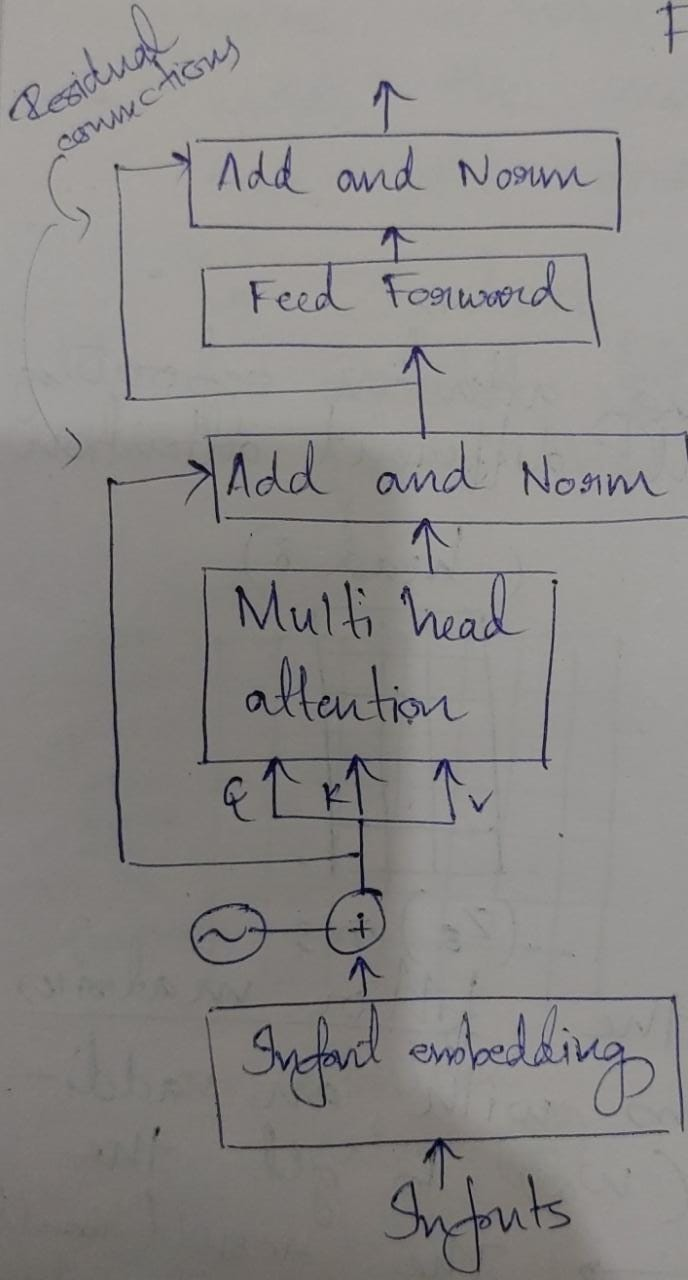
</div>


<div>
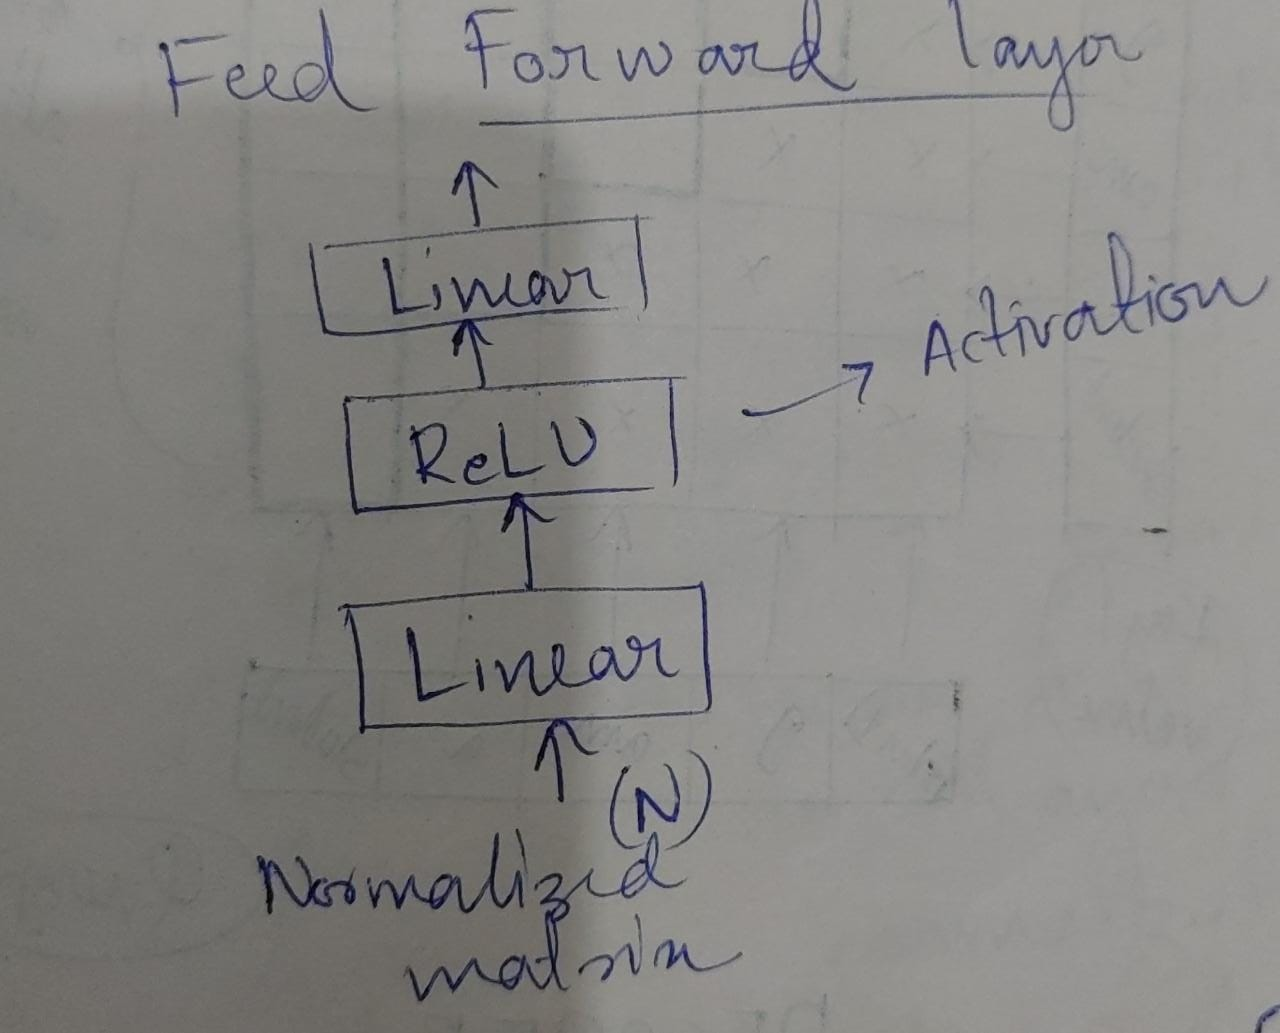
</div>

<div>
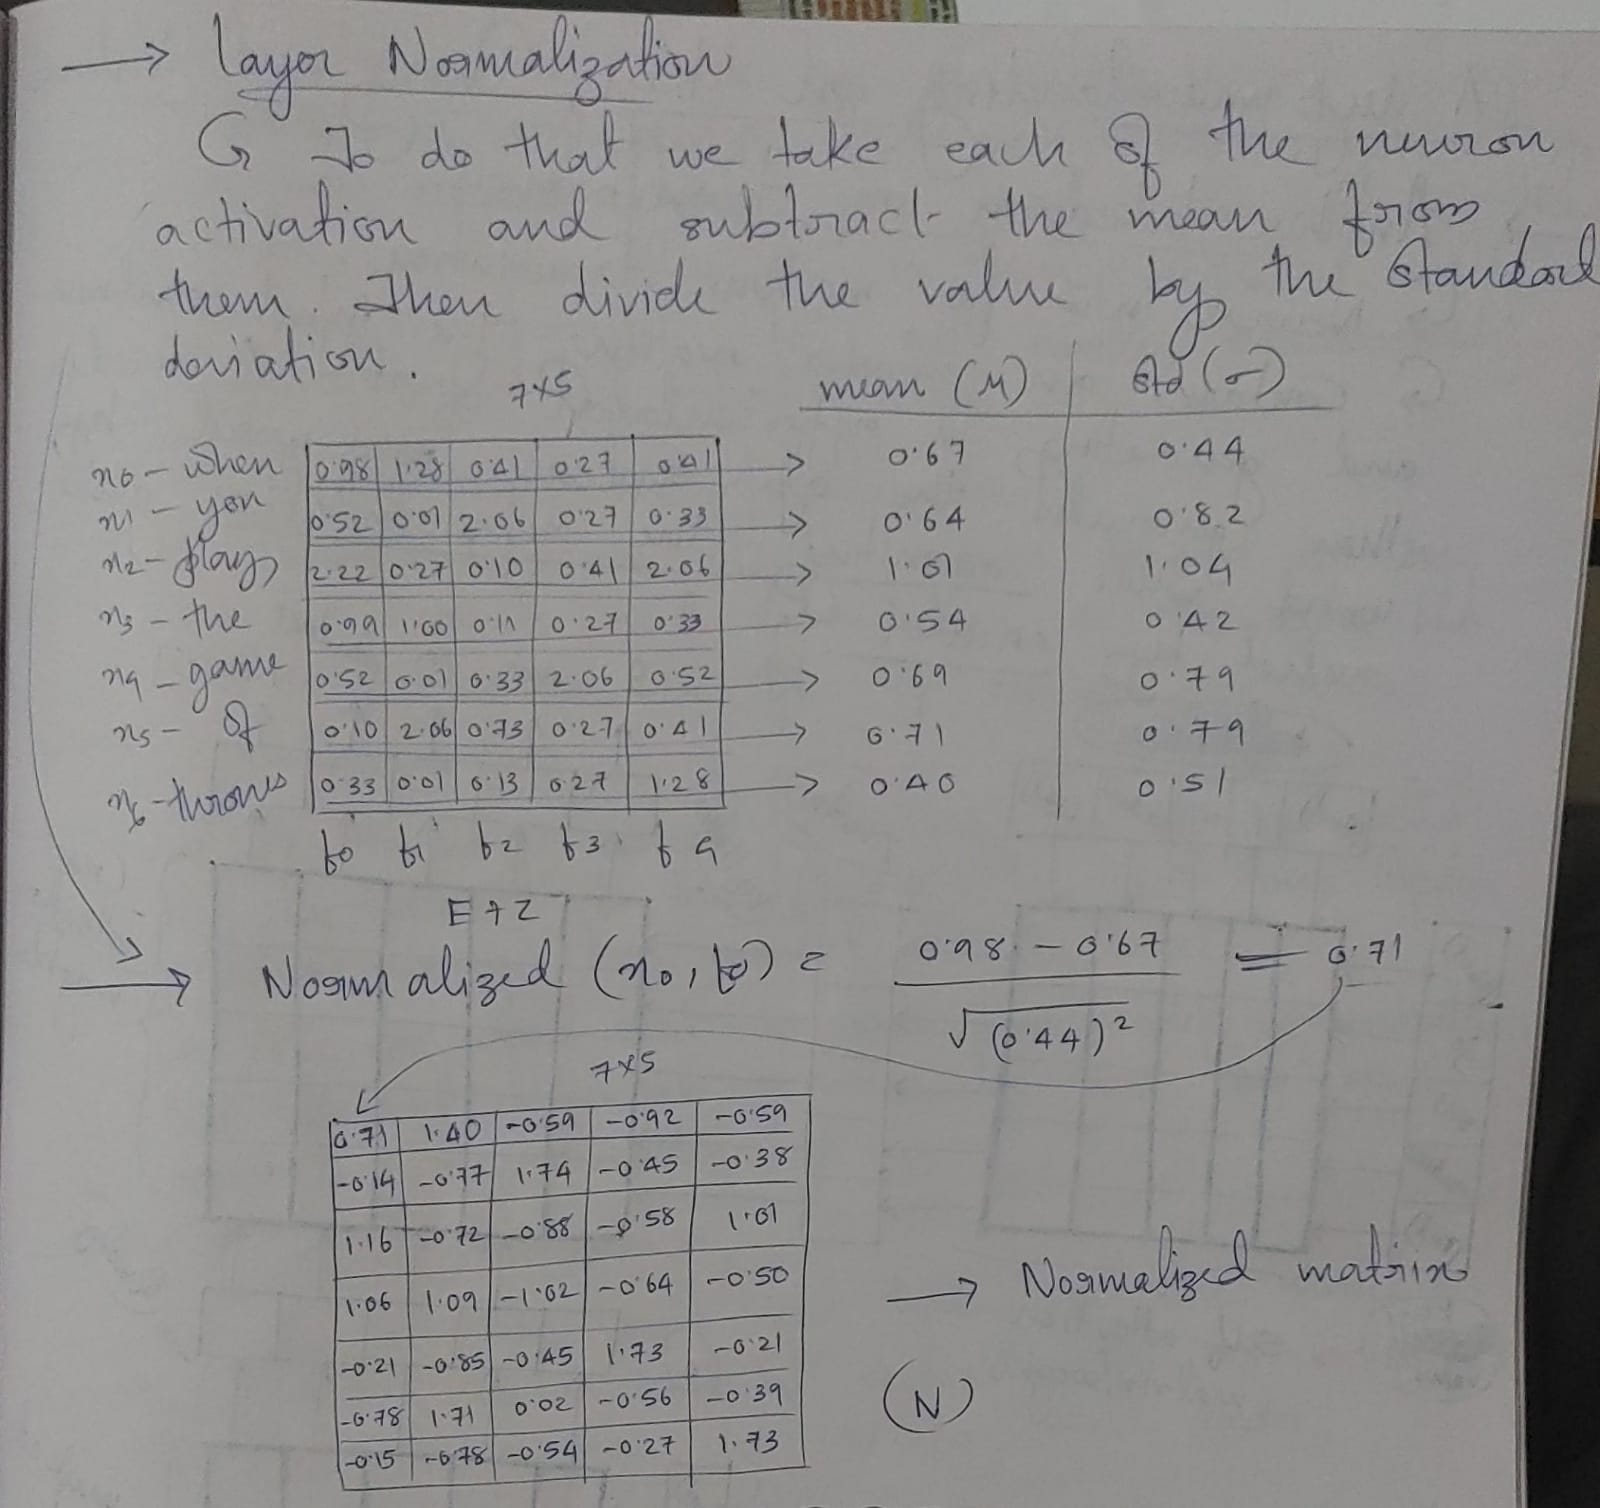
</div>



Here the number of Encoder stacks are 6 and the emebedding dimension is 512. So the first encoder receives the encoded input.Then the output of the first encoder is passed to second encoder and so on.

In [25]:
from keras.layers import LayerNormalization, Layer, Dense, ReLU, Dropout
# from multihead_attention import MultiHeadAttention
# from positional_encoding import PositionEmbeddingFixedWeights
from numpy import random

# Implementing the Add & Norm Layer
class AddNormalization(Layer):
    def __init__(self, **kwargs):
        super(AddNormalization, self).__init__(**kwargs)
        self.layer_norm = LayerNormalization()  # Layer normalization layer

    def call(self, x, sublayer_x):
        # The sublayer input and output need to be of the same shape to be summed
        add = x + sublayer_x

        # Apply layer normalization to the sum
        return self.layer_norm(add)

# Implementing the Feed-Forward Layer
class FeedForward(Layer):
    def __init__(self, d_ff, d_model, **kwargs):
        super(FeedForward, self).__init__(**kwargs)
        self.fully_connected1 = Dense(d_ff)  # First fully connected layer
        self.fully_connected2 = Dense(d_model)  # Second fully connected layer
        self.activation = ReLU()  # ReLU activation layer

    def call(self, x):
        # The input is passed into the two fully-connected layers, with a ReLU in between
        x_fc1 = self.fully_connected1(x)

        return self.fully_connected2(self.activation(x_fc1))

# Implementing the Encoder Layer
class EncoderLayer(Layer):
    def __init__(self, h, d_k, d_v, d_model, d_ff, rate, **kwargs):
        super(EncoderLayer, self).__init__(**kwargs)
        self.multihead_attention = MultiHeadAttention(h, d_k, d_v, d_model)
        self.dropout1 = Dropout(rate)
        self.add_norm1 = AddNormalization()
        self.feed_forward = FeedForward(d_ff, d_model)
        self.dropout2 = Dropout(rate)
        self.add_norm2 = AddNormalization()

    def call(self, x, padding_mask, training):
        # Multi-head attention layer
        multihead_output = self.multihead_attention(x, x, x, padding_mask)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in a dropout layer
        multihead_output = self.dropout1(multihead_output, training=training)

        # Followed by an Add & Norm layer
        addnorm_output = self.add_norm1(x, multihead_output)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Followed by a fully connected layer
        feedforward_output = self.feed_forward(addnorm_output)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in another dropout layer
        feedforward_output = self.dropout2(feedforward_output, training=training)

        # Followed by another Add & Norm layer
        return self.add_norm2(addnorm_output, feedforward_output)

# Implementing the Encoder
class Encoder(Layer):
    def __init__(self, vocab_size, sequence_length, h, d_k, d_v, d_model, d_ff, n, rate, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.pos_encoding = PositionEmbeddingFixedWeights(sequence_length, vocab_size, d_model)
        self.dropout = Dropout(rate)
        self.encoder_layer = [EncoderLayer(h, d_k, d_v, d_model, d_ff, rate) for _ in range(n)]

    def call(self, input_sentence, padding_mask, training):
        #input_sentence => (64,5)
        # Generate the positional encoding
        pos_encoding_output = self.pos_encoding(input_sentence)
        #pos_encoding_output => (64,5,512)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in a dropout layer
        x = self.dropout(pos_encoding_output, training=training)  # x=> (64,5,512)

        # Pass on the positional encoded values to each encoder layer
        for i, layer in enumerate(self.encoder_layer):
            x = layer(x, padding_mask, training) #connecting n encoder layer

        return x   # x=> (64,5,512)


In [26]:
enc_vocab_size = 20  # Vocabulary size for the encoder
input_seq_length = 5  # Maximum length of the input sequence
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_ff = 2048  # Dimensionality of the inner fully connected layer
d_model = 512  # Dimensionality of the model sub-layers' outputs
n = 6  # Number of layers in the encoder stack

batch_size = 64  # Batch size from the training process
dropout_rate = 0.1 # Frequency of dropping the input units in the dropout layers

input_seq = random.random((batch_size, input_seq_length))

encoder = Encoder(enc_vocab_size, input_seq_length, h, d_k, d_v, d_model, d_ff, n, dropout_rate)
print(encoder(input_seq, None, True))

tf.Tensor(
[[[ 0.6497308  -0.4071596  -0.40736845 ...  0.5197053  -0.61379176
    0.6561488 ]
  [ 1.0609251   0.0389684  -0.26373437 ...  0.04769601 -1.4397734
    1.7888635 ]
  [ 0.25156975 -0.0720749   0.08178171 ... -0.03031336 -0.52372
    0.48977405]
  [ 1.3895062   0.72151387  0.18508361 ...  0.11367561 -0.46572626
    2.1255305 ]
  [ 0.6390467  -0.3394202  -0.02242929 ...  0.4445464  -0.3364162
    2.2640815 ]]

 [[ 0.5684865   0.9209763   0.4600673  ...  0.60552216 -0.4104458
    1.468081  ]
  [ 0.5338995   0.0904137  -0.12124874 ... -0.60083526 -0.8388608
    1.9669383 ]
  [ 1.3125943   0.19283028 -0.1868739  ...  0.40083295 -0.1805339
    1.7508814 ]
  [ 0.6093492  -0.22609091 -0.9036721  ... -0.30998173 -0.65734106
    1.1383836 ]
  [ 0.48486605 -0.17203169  0.39684892 ...  0.08815866 -1.0366964
    1.6013962 ]]

 [[-0.23900823  0.38495958 -0.76699406 ... -0.1951827  -0.03477063
    0.76108724]
  [ 0.77265954  0.90558815 -0.67862713 ...  0.60225564 -0.2161395
    1.4313134 ]

### Decoder Layer

In [27]:
from keras.layers import Layer, Dropout
# from multihead_attention import MultiHeadAttention
# from positional_encoding import PositionEmbeddingFixedWeights
# from encoder import AddNormalization, FeedForward


# Implementing the Decoder Layer
class DecoderLayer(Layer):
    def __init__(self, h, d_k, d_v, d_model, d_ff, rate, **kwargs):
        super(DecoderLayer, self).__init__(**kwargs)
        self.multihead_attention1 = MultiHeadAttention(h, d_k, d_v, d_model)
        self.dropout1 = Dropout(rate)
        self.add_norm1 = AddNormalization()
        self.multihead_attention2 = MultiHeadAttention(h, d_k, d_v, d_model)
        self.dropout2 = Dropout(rate)
        self.add_norm2 = AddNormalization()
        self.feed_forward = FeedForward(d_ff, d_model)
        self.dropout3 = Dropout(rate)
        self.add_norm3 = AddNormalization()

    def call(self, x, encoder_output, lookahead_mask, padding_mask, training):
        # Multi-head attention layer
        multihead_output1 = self.multihead_attention1(x, x, x, lookahead_mask)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in a dropout layer
        multihead_output1 = self.dropout1(multihead_output1, training=training)

        # Followed by an Add & Norm layer
        addnorm_output1 = self.add_norm1(x, multihead_output1)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Followed by another multi-head attention layer
        multihead_output2 = self.multihead_attention2(addnorm_output1, encoder_output, encoder_output, padding_mask)

        # Add in another dropout layer
        multihead_output2 = self.dropout2(multihead_output2, training=training)

        # Followed by another Add & Norm layer
        addnorm_output2 = self.add_norm1(addnorm_output1, multihead_output2)

        # Followed by a fully connected layer
        feedforward_output = self.feed_forward(addnorm_output2)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in another dropout layer
        feedforward_output = self.dropout3(feedforward_output, training=training)

        # Followed by another Add & Norm layer
        return self.add_norm3(addnorm_output2, feedforward_output)


# Implementing the Decoder
class Decoder(Layer):
    def __init__(self, vocab_size, sequence_length, h, d_k, d_v, d_model, d_ff, n, rate, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.pos_encoding = PositionEmbeddingFixedWeights(sequence_length, vocab_size, d_model)
        self.dropout = Dropout(rate)
        self.decoder_layer = [DecoderLayer(h, d_k, d_v, d_model, d_ff, rate) for _ in range(n)]

    def call(self, output_target, encoder_output, lookahead_mask, padding_mask, training):
        # Generate the positional encoding
        pos_encoding_output = self.pos_encoding(output_target)
        # Expected output shape = (number of sentences, sequence_length, d_model)

        # Add in a dropout layer
        x = self.dropout(pos_encoding_output, training=training)

        # Pass on the positional encoded values to each encoder layer
        for i, layer in enumerate(self.decoder_layer):
            x = layer(x, encoder_output, lookahead_mask, padding_mask, training)  #connecting n decoder layer

        return x  # (64, 5, 512)
 

In [28]:
from numpy import random

dec_vocab_size = 20  # Vocabulary size for the decoder
input_seq_length = 5  # Maximum length of the input sequence
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_ff = 2048  # Dimensionality of the inner fully connected layer
d_model = 512  # Dimensionality of the model sub-layers' outputs
n = 6  # Number of layers in the decoder stack

batch_size = 64  # Batch size from the training process
dropout_rate = 0.1  # Frequency of dropping the input units in the dropout layers

input_seq = random.random((batch_size, input_seq_length))
enc_output = random.random((batch_size, input_seq_length, d_model))

decoder = Decoder(dec_vocab_size, input_seq_length, h, d_k, d_v, d_model, d_ff, n, dropout_rate)
print(decoder(input_seq, enc_output, None, True))

tf.Tensor(
[[[ 1.04273885e-01  9.67773080e-01  6.79657638e-01 ...  9.42572415e-01
   -4.73660290e-01 -1.92074776e+00]
  [ 1.63997024e-01  9.13796782e-01  6.93192959e-01 ...  8.94051373e-01
   -4.21587318e-01 -1.84908426e+00]
  [ 1.73403904e-01  8.56106758e-01  6.52184367e-01 ...  8.19816053e-01
   -3.93336385e-01 -1.78849697e+00]
  [ 9.81307700e-02  8.57472658e-01  5.72192907e-01 ...  7.70968497e-01
   -4.18568790e-01 -1.76642501e+00]
  [ 1.60178309e-03  9.26754236e-01  5.04550576e-01 ...  7.59377241e-01
   -4.69179273e-01 -1.78214133e+00]]

 [[ 2.49312729e-01  7.99662948e-01  7.29956746e-01 ...  1.12977028e+00
   -3.66734415e-01 -1.92917597e+00]
  [ 3.25791895e-01  7.44600117e-01  7.42837310e-01 ...  1.08791816e+00
   -3.21424901e-01 -1.83956635e+00]
  [ 3.38002414e-01  7.09035397e-01  7.04205573e-01 ...  1.02167499e+00
   -2.94847012e-01 -1.76780784e+00]
  [ 2.57286638e-01  7.22302735e-01  6.14165306e-01 ...  9.62935925e-01
   -3.13333809e-01 -1.75030816e+00]
  [ 1.50452793e-01  7.81

### Joining Encoder and Decoder

In [29]:
# from encoder import Encoder
# from decoder import Decoder
from tensorflow import math, cast, float32, linalg, ones, maximum, newaxis
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
 
class TransformerModel(Model):
    def __init__(self, enc_vocab_size, dec_vocab_size, enc_seq_length, dec_seq_length, h, d_k, d_v, d_model, d_ff_inner, n, rate, **kwargs):
        super(TransformerModel, self).__init__(**kwargs)
 
        # Set up the encoder
        self.encoder = Encoder(enc_vocab_size, enc_seq_length, h, d_k, d_v, d_model, d_ff_inner, n, rate)
 
        # Set up the decoder
        self.decoder = Decoder(dec_vocab_size, dec_seq_length, h, d_k, d_v, d_model, d_ff_inner, n, rate)
 
        # Define the final dense layer
        self.model_last_layer = Dense(dec_vocab_size)
 
    def padding_mask(self, input):
        # Create mask which marks the zero padding values in the input by a 1.0
        mask = math.equal(input, 0)
        mask = cast(mask, float32)
 
        # The shape of the mask should be broadcastable to the shape
        # of the attention weights that it will be masking later on
        return mask[:, newaxis, newaxis, :]
 
    def lookahead_mask(self, shape):
        # Mask out future entries by marking them with a 1.0
        mask = 1 - linalg.band_part(ones((shape, shape)), -1, 0)
 
        return mask
 
    def call(self, encoder_input, decoder_input, training):
 
        # Create padding mask to mask the encoder inputs and the encoder outputs in the decoder
        enc_padding_mask = self.padding_mask(encoder_input)
 
        # Create and combine padding and look-ahead masks to be fed into the decoder
        dec_in_padding_mask = self.padding_mask(decoder_input)
        dec_in_lookahead_mask = self.lookahead_mask(decoder_input.shape[1])
        dec_in_lookahead_mask = maximum(dec_in_padding_mask, dec_in_lookahead_mask)
 
        # Feed the input into the encoder
        encoder_output = self.encoder(encoder_input, enc_padding_mask, training)
 
        # Feed the encoder output into the decoder
        decoder_output = self.decoder(decoder_input, encoder_output, dec_in_lookahead_mask, enc_padding_mask, training)
 
        # Pass the decoder output through a final dense layer
        model_output = self.model_last_layer(decoder_output)
 
        return model_output

In [30]:
enc_vocab_size = 20 # Vocabulary size for the encoder
dec_vocab_size = 20 # Vocabulary size for the decoder
 
enc_seq_length = 5  # Maximum length of the input sequence
dec_seq_length = 5  # Maximum length of the target sequence
 
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_ff = 2048  # Dimensionality of the inner fully connected layer
d_model = 512  # Dimensionality of the model sub-layers' outputs
n = 6  # Number of layers in the encoder stack
 
dropout_rate = 0.1  # Frequency of dropping the input units in the dropout layers
 
# Create model
training_model = TransformerModel(enc_vocab_size, dec_vocab_size, enc_seq_length, dec_seq_length, h, d_k, d_v, d_model, d_ff, n, dropout_rate)

### Prepare Dataset

#### Creating the .pkl dataset

In [31]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, mode='rt', encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# split a loaded document into sentences
def to_pairs(doc):
    lines = doc.strip().split('\n')
    pairs = [line.split('\t') for line in  lines]
    return pairs

# clean a list of lines
def clean_pairs(lines):
    cleaned = list()
    # prepare regex for char filtering
    re_print = re.compile('[^%s]' % re.escape(string.printable))
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for pair in lines:
        clean_pair = list()
        for line in pair:
            # normalize unicode characters
            line = normalize('NFD', line).encode('ascii', 'ignore')
            line = line.decode('UTF-8')
            # tokenize on white space
            line = line.split()
            # convert to lowercase
            line = [word.lower() for word in line]
            # remove punctuation from each token
            line = [word.translate(table) for word in line]
            # remove non-printable chars form each token
            line = [re_print.sub('', w) for w in line]
            # remove tokens with numbers in them
            line = [word for word in line if word.isalpha()]
            # store as string
            clean_pair.append(' '.join(line))
        cleaned.append(clean_pair)
    return array(cleaned)

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

# load dataset
filename = 'deu.txt'
doc = load_doc(filename)
# split into english-german pairs
pairs = to_pairs(doc)
# clean sentences
clean_pairs = clean_pairs(pairs)
# save clean pairs to file
save_clean_data(clean_pairs, 'english-german.pkl')
# spot check
for i in range(100):
    print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))

Saved: english-german.pkl
[hi] => [hallo]
[hi] => [gru gott]
[run] => [lauf]
[wow] => [potzdonner]
[wow] => [donnerwetter]
[fire] => [feuer]
[help] => [hilfe]
[help] => [zu hulf]
[stop] => [stopp]
[wait] => [warte]
[hello] => [hallo]
[i try] => [ich probiere es]
[i won] => [ich hab gewonnen]
[i won] => [ich habe gewonnen]
[smile] => [lacheln]
[cheers] => [zum wohl]
[freeze] => [keine bewegung]
[freeze] => [stehenbleiben]
[got it] => [verstanden]
[got it] => [einverstanden]
[he ran] => [er rannte]
[he ran] => [er lief]
[hop in] => [mach mit]
[hug me] => [druck mich]
[hug me] => [nimm mich in den arm]
[hug me] => [umarme mich]
[i fell] => [ich fiel]
[i fell] => [ich fiel hin]
[i fell] => [ich sturzte]
[i fell] => [ich bin hingefallen]
[i fell] => [ich bin gesturzt]
[i know] => [ich wei]
[i lied] => [ich habe gelogen]
[i lost] => [ich habe verloren]
[im] => [ich bin jahre alt]
[im] => [ich bin]
[im ok] => [mir gehts gut]
[im ok] => [es geht mir gut]
[no way] => [unmoglich]
[no way] => [da

In [53]:
from pickle import load
from numpy.random import shuffle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import convert_to_tensor, int64
 
class PrepareDataset:
    def __init__(self, **kwargs):
        super(PrepareDataset, self).__init__(**kwargs)
        self.n_sentences = 10000  # Number of sentences to include in the dataset
        self.train_split = 0.9  # Ratio of the training data split
 
    # Fit a tokenizer
    def create_tokenizer(self, dataset):
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(dataset)

        return tokenizer
 
    def find_seq_length(self, dataset):
        return max(len(seq.split()) for seq in dataset)
 
    def find_vocab_size(self, tokenizer, dataset):
        tokenizer.fit_on_texts(dataset)
 
        return len(tokenizer.word_index) + 1
 
    # Encode and pad the input sequences
    def encode_pad(self, dataset, tokenizer, seq_length):
        x = tokenizer.texts_to_sequences(dataset)
        x = pad_sequences(x, maxlen=seq_length, padding='post')
        x = convert_to_tensor(x, dtype=int64)
 
        return x
 
    def save_tokenizer(self, tokenizer, name):
        with open(name + '_tokenizer.pkl', 'wb') as handle:
            dump(tokenizer, handle, protocol=HIGHEST_PROTOCOL)    

    def __call__(self, filename, **kwargs):
        # Load a clean dataset
        clean_dataset = load(open(filename, 'rb'))

        # Reduce dataset size
        dataset = clean_dataset[:self.n_sentences, :]

        # Include start and end of string tokens
        for i in range(dataset[:, 0].size):
            dataset[i, 0] = "<START> " + dataset[i, 0] + " <EOS>"
            dataset[i, 1] = "<START> " + dataset[i, 1] + " <EOS>"

        # Random shuffle the dataset
        shuffle(dataset)

        # Split the dataset
        train = dataset[:int(self.n_sentences * self.train_split)]

        # Prepare tokenizer for the encoder input
        enc_tokenizer = self.create_tokenizer(train[:, 0])
        enc_seq_length = self.find_seq_length(train[:, 0])
        enc_vocab_size = self.find_vocab_size(enc_tokenizer, train[:, 0])

        # Encode and pad the input sequences
        trainX = enc_tokenizer.texts_to_sequences(train[:, 0])
        trainX = pad_sequences(trainX, maxlen=enc_seq_length, padding='post')
        trainX = convert_to_tensor(trainX, dtype=int64)

        # Prepare tokenizer for the decoder input
        dec_tokenizer = self.create_tokenizer(train[:, 1])
        dec_seq_length = self.find_seq_length(train[:, 1])
        dec_vocab_size = self.find_vocab_size(dec_tokenizer, train[:, 1])

        # Encode and pad the input sequences
        trainY = dec_tokenizer.texts_to_sequences(train[:, 1])
        trainY = pad_sequences(trainY, maxlen=dec_seq_length, padding='post')
        trainY = convert_to_tensor(trainY, dtype=int64)
        
        # Save the encoder tokenizer
        self.save_tokenizer(enc_tokenizer, 'enc')
 
        # Save the decoder tokenizer
        self.save_tokenizer(dec_tokenizer, 'dec')
 
        # Save the testing dataset into a text file
#         savetxt('test_dataset.txt', test, fmt='%s')

        return trainX, trainY, train, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size

In [54]:
# Prepare the training data
dataset = PrepareDataset()
trainX, trainY, train_orig, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size = dataset('english-german-both.pkl')
 
print(train_orig, '\n', trainX)

[['<START> get off my lawn <EOS>'
  '<START> herunter von meinem rasen <EOS>']
 ['<START> tom is all ears <EOS>' '<START> tom ist ganz ohr <EOS>']
 ['<START> tom is full <EOS>' '<START> tom ist satt <EOS>']
 ...
 ['<START> she was perfect <EOS>' '<START> sie war perfekt <EOS>']
 ['<START> might i come in <EOS>' '<START> darf ich reinkommen <EOS>']
 ['<START> youre strong <EOS>' '<START> sie sind stark <EOS>']] 
 tf.Tensor(
[[  1  41 144 ... 704   2   0]
 [  1   4   7 ... 405   2   0]
 [  1   4   7 ...   2   0   0]
 ...
 [  1  24  19 ...   2   0   0]
 [  1 313   3 ...  43   2   0]
 [  1  26 358 ...   0   0   0]], shape=(9000, 7), dtype=int64)


### Training the Transformer Model 

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.metrics import Mean
from tensorflow import data, train, math, reduce_sum, cast, equal, argmax, float32, GradientTape, TensorSpec, function, int64
from keras.losses import sparse_categorical_crossentropy
# from model import TransformerModel
# from prepare_dataset import PrepareDataset
from time import time


# Define the model parameters
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of model layers' outputs
d_ff = 2048  # Dimensionality of the inner fully connected layer
n = 6  # Number of layers in the encoder stack

# Define the training parameters
epochs = 2
batch_size = 64
beta_1 = 0.9
beta_2 = 0.98
epsilon = 1e-9
dropout_rate = 0.1


# Implementing a learning rate scheduler
class LRScheduler(LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000, **kwargs):
        super(LRScheduler, self).__init__(**kwargs)

        self.d_model = cast(d_model, float32)
#         self.warmup_steps = warmup_steps
        self.warmup_steps =  tf.cast(warmup_steps, tf.float32)

    def __call__(self, step_num):

        # Linearly increasing the learning rate for the first warmup_steps, and decreasing it thereafter
        step_num = tf.cast(step_num, tf.float32)
        
        arg1 = step_num ** -0.5
        arg2 = step_num * (self.warmup_steps ** -1.5)

        return (self.d_model ** -0.5) * math.minimum(arg1, arg2)


# Instantiate an Adam optimizer
optimizer = Adam(LRScheduler(d_model), beta_1, beta_2, epsilon)

# Prepare the training and test splits of the dataset
dataset = PrepareDataset()
trainX, trainY, train_orig, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size = dataset('english-german-both.pkl')

# Prepare the dataset batches
train_dataset = data.Dataset.from_tensor_slices((trainX, trainY))
train_dataset = train_dataset.batch(batch_size)
# train_dataset = train_dataset.batch(1)

# Create model
training_model = TransformerModel(enc_vocab_size, dec_vocab_size, enc_seq_length, dec_seq_length, h, d_k, d_v, d_model, d_ff, n, dropout_rate)


# Defining the loss function
def loss_fcn(target, prediction):
    # Create mask so that the zero padding values are not included in the computation of loss
    padding_mask = math.logical_not(equal(target, 0))
#     print("loss_1",padding_mask)
    padding_mask = cast(padding_mask, float32)
#     print("loss_2",padding_mask)

    # Compute a sparse categorical cross-entropy loss on the unmasked values
    # categorical cross entropy is calculated on the logits itselg Not converting to softmax probabilities.
    loss = sparse_categorical_crossentropy(target, prediction, from_logits=True) * padding_mask  
#     print("loss_3",loss)
    # Compute the mean loss over the unmasked values
    return reduce_sum(loss) / reduce_sum(padding_mask)


# Defining the accuracy function
def accuracy_fcn(target, prediction):
    # Create mask so that the zero padding values are not included in the computation of accuracy
    padding_mask = math.logical_not(equal(target, 0))

    # Find equal prediction and target values, and apply the padding mask
    accuracy = equal(target, argmax(prediction, axis=2))
    accuracy = math.logical_and(padding_mask, accuracy)

    # Cast the True/False values to 32-bit-precision floating-point numbers
    padding_mask = cast(padding_mask, float32)
    accuracy = cast(accuracy, float32)

    # Compute the mean accuracy over the unmasked values
    return reduce_sum(accuracy) / reduce_sum(padding_mask)

<div>
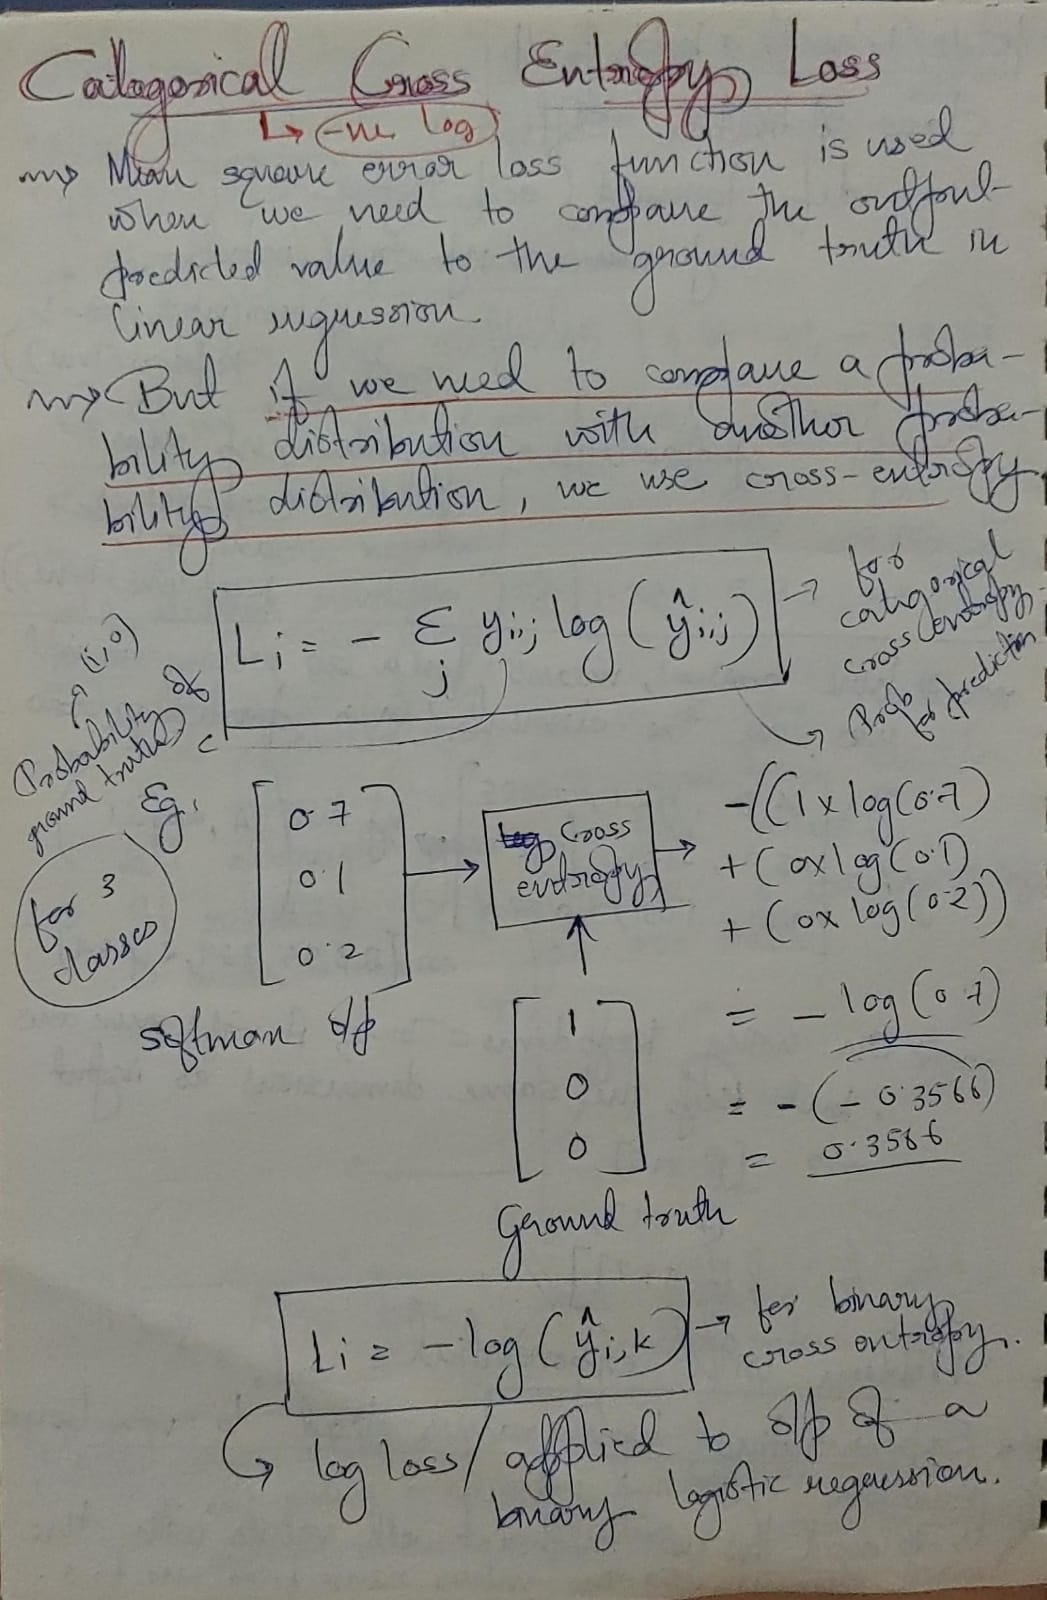
</div>


<div>
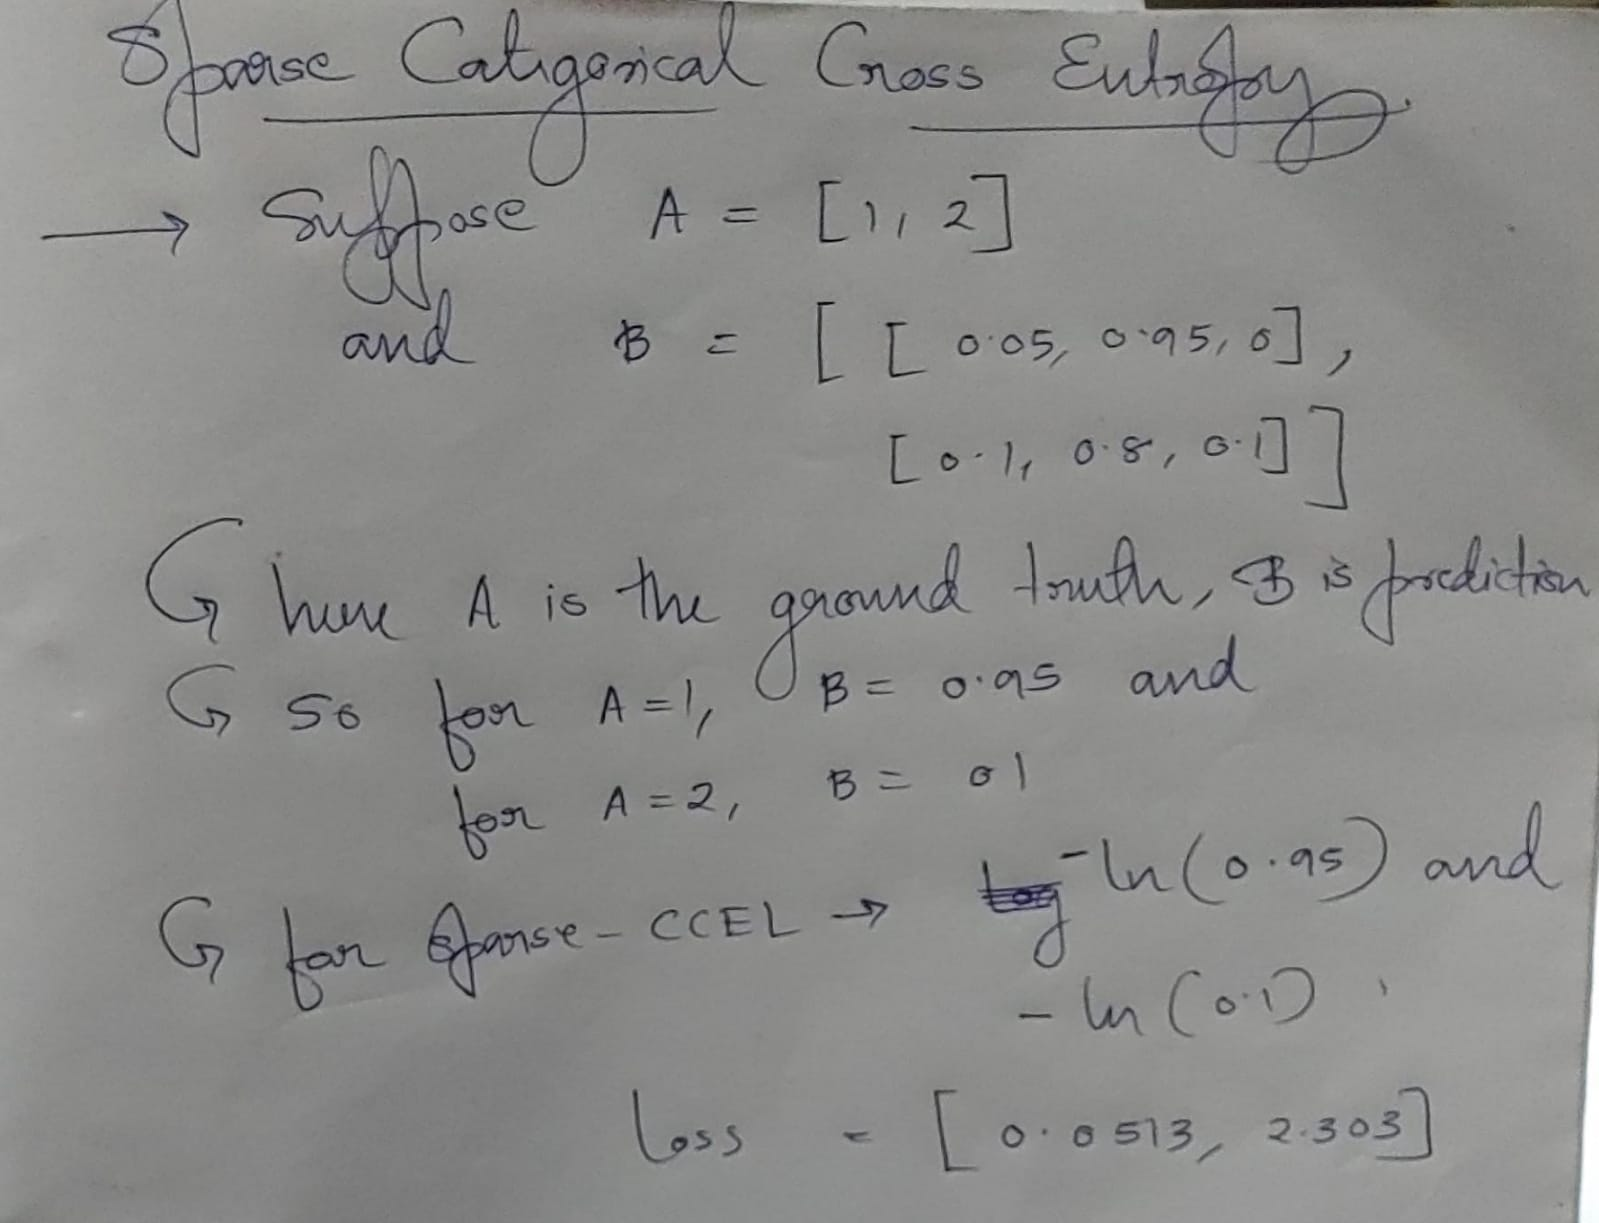
</div>


<div>
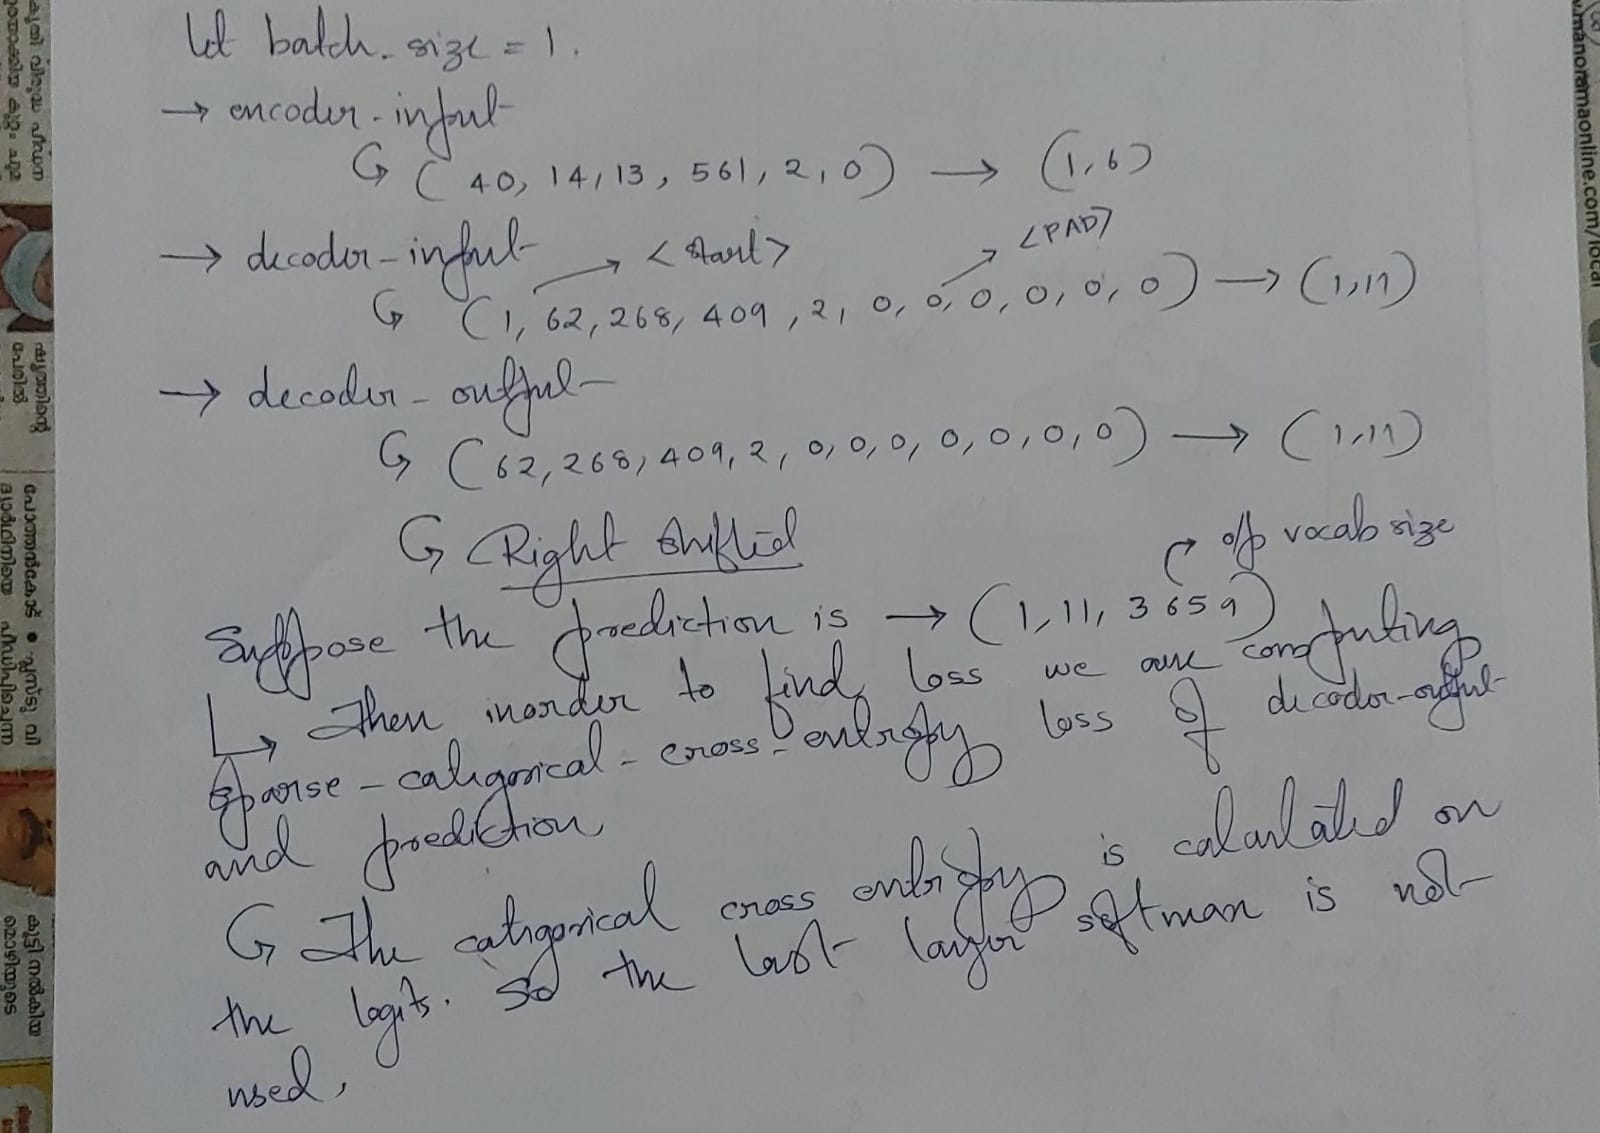
</div>


In [35]:
# Include metrics monitoring
train_loss = Mean(name='train_loss')
train_accuracy = Mean(name='train_accuracy')

# Create a checkpoint object and manager to manage multiple checkpoints
ckpt = train.Checkpoint(model=training_model, optimizer=optimizer)
ckpt_manager = train.CheckpointManager(ckpt, "./checkpoints", max_to_keep=3)

# # Speeding up the training process
@function
def train_step(encoder_input, decoder_input, decoder_output):
    with GradientTape() as tape:

        # Run the forward pass of the model to generate a prediction
        prediction = training_model(encoder_input, decoder_input, training=True)

        # Compute the training loss
        loss = loss_fcn(decoder_output, prediction)

        # Compute the training accuracy
        accuracy = accuracy_fcn(decoder_output, prediction)

    # Retrieve gradients of the trainable variables with respect to the training loss
    gradients = tape.gradient(loss, training_model.trainable_weights)

    # Update the values of the trainable variables by gradient descent
    optimizer.apply_gradients(zip(gradients, training_model.trainable_weights))

    train_loss(loss)
    train_accuracy(accuracy)


for epoch in range(epochs):

    train_loss.reset_states()
    train_accuracy.reset_states()

    print("\nStart of epoch %d" % (epoch + 1))

    start_time = time()

    # Iterate over the dataset batches
    for step, (train_batchX, train_batchY) in enumerate(train_dataset):

        # Define the encoder and decoder inputs, and the decoder output
        encoder_input = train_batchX[:, 1:]
        decoder_input = train_batchY[:, :-1]
        decoder_output = train_batchY[:, 1:]

        train_step(encoder_input, decoder_input, decoder_output)

        if step % 50 == 0:
            print(f'Epoch {epoch + 1} Step {step} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
            # print("Samples so far: %s" % ((step + 1) * batch_size))

    # Print epoch number and loss value at the end of every epoch
    print("Epoch %d: Training Loss %.4f, Training Accuracy %.4f" % (epoch + 1, train_loss.result(), train_accuracy.result()))

    # Save a checkpoint after every five epochs
    if (epoch + 1) % 5 == 0:
        save_path = ckpt_manager.save()
        print("Saved checkpoint at epoch %d" % (epoch + 1))

print("Total time taken: %.2fs" % (time() - start_time))


Start of epoch 1
Epoch 1 Step 0 Loss 8.3442 Accuracy 0.0000
Epoch 1 Step 50 Loss 7.6040 Accuracy 0.1238
Epoch 1 Step 100 Loss 7.0028 Accuracy 0.1722
Epoch 1: Training Loss 6.6848, Training Accuracy 0.1925

Start of epoch 2
Epoch 2 Step 0 Loss 5.6322 Accuracy 0.2724
Epoch 2 Step 50 Loss 5.4425 Accuracy 0.2724
Epoch 2 Step 100 Loss 5.2851 Accuracy 0.2809
Epoch 2: Training Loss 5.1512, Training Accuracy 0.2887
Total time taken: 234.07s


In [36]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.int64, name=None), TensorSpec(shape=(None, 12), dtype=tf.int64, name=None))>

In [37]:
# Iterate over the dataset batches
for step, (train_batchX, train_batchY) in enumerate(train_dataset):

    # Define the encoder and decoder inputs, and the decoder output
    encoder_input = train_batchX[:, 1:]
    decoder_input = train_batchY[:, :-1]
    decoder_output = train_batchY[:, 1:]

In [38]:
#suppose batch_size= 1
encoder_input

<tf.Tensor: shape=(40, 6), dtype=int64, numpy=
array([[ 123,   13,  174,    2,    0,    0],
       [  15,   35,  184,    2,    0,    0],
       [  19,   38,   60,  200,    2,    0],
       [  45,  110,    4,    2,    0,    0],
       [   4,  203,  511,    2,    0,    0],
       [  58,   31,   12,    6,    2,    0],
       [   4,  257,   66,    2,    0,    0],
       [  44,  982,    2,    0,    0,    0],
       [  10,  109, 1140,    2,    0,    0],
       [   3,   27,   67,  492,    2,    0],
       [  49,  814,    2,    0,    0,    0],
       [   9,  315,  133,    2,    0,    0],
       [   4,   99,    8, 2297,    2,    0],
       [ 181,   40,    8, 1426,    2,    0],
       [  15,  145,    2,    0,    0,    0],
       [ 127,   56,    2,    0,    0,    0],
       [   4, 1123,    8,  271,    2,    0],
       [   9,   97,   38,  263,    2,    0],
       [   4,  354,  270,    2,    0,    0],
       [  52,   81,  632,    2,    0,    0],
       [   9,   63,  162,    2,    0,    0],
       [

In [39]:
decoder_input

<tf.Tensor: shape=(40, 11), dtype=int64, numpy=
array([[   1,  685,   24,  179,    2,    0,    0,    0,    0,    0,    0],
       [   1,   11,   27,  416,    2,    0,    0,    0,    0,    0,    0],
       [   1,  258,    6,   33,   10,   68,  129,    2,    0,    0,    0],
       [   1,    3,  910,   52,    5,    2,    0,    0,    0,    0,    0],
       [   1,    5,  153,  949,   47,    2,    0,    0,    0,    0,    0],
       [   1, 1219,   94,    8,    2,    0,    0,    0,    0,    0,    0],
       [   1,    5,    4, 3662,   73,    2,    0,    0,    0,    0,    0],
       [   1,    5,    4, 1885,    2,    0,    0,    0,    0,    0,    0],
       [   1,    3,   12,   17, 3663,    2,    0,    0,    0,    0,    0],
       [   1,    3,   22, 3664,  139,    2,    0,    0,    0,    0,    0],
       [   1,    6, 3665,   33,    2,    0,    0,    0,    0,    0,    0],
       [   1,    9,   14,  279,  496,    2,    0,    0,    0,    0,    0],
       [   1,    5,   79,   17, 3666,    2,    0,   

In [40]:
decoder_output

<tf.Tensor: shape=(40, 11), dtype=int64, numpy=
array([[ 685,   24,  179,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,   27,  416,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 258,    6,   33,   10,   68,  129,    2,    0,    0,    0,    0],
       [   3,  910,   52,    5,    2,    0,    0,    0,    0,    0,    0],
       [   5,  153,  949,   47,    2,    0,    0,    0,    0,    0,    0],
       [1219,   94,    8,    2,    0,    0,    0,    0,    0,    0,    0],
       [   5,    4, 3662,   73,    2,    0,    0,    0,    0,    0,    0],
       [   5,    4, 1885,    2,    0,    0,    0,    0,    0,    0,    0],
       [   3,   12,   17, 3663,    2,    0,    0,    0,    0,    0,    0],
       [   3,   22, 3664,  139,    2,    0,    0,    0,    0,    0,    0],
       [   6, 3665,   33,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,   14,  279,  496,    2,    0,    0,    0,    0,    0,    0],
       [   5,   79,   17, 3666,    2,    0,    0,   

In [41]:
prediction = training_model(encoder_input, decoder_input, training=True)
prediction.shape   # 3675 is the vocab size of decider

TensorShape([40, 11, 3671])

In [42]:
prediction

<tf.Tensor: shape=(40, 11, 3671), dtype=float32, numpy=
array([[[-1.5414337 , -2.3394692 ,  1.8368058 , ..., -1.003769  ,
         -0.56608444, -0.8454984 ],
        [-1.6294256 , -1.9104855 ,  3.7309635 , ..., -1.3266865 ,
         -0.9949823 , -1.2382832 ],
        [-1.8726474 , -1.8449624 ,  4.4527297 , ..., -1.5726328 ,
         -0.9966718 , -1.3584982 ],
        ...,
        [-2.1206164 , -1.3247766 ,  5.655066  , ..., -1.5709755 ,
         -1.2295959 , -1.2182897 ],
        [-1.6542766 , -1.6056297 ,  5.4530463 , ..., -1.4066312 ,
         -1.1050253 , -1.1596886 ],
        [-2.0424724 , -1.3843179 ,  6.038737  , ..., -1.4543477 ,
         -1.2049485 , -1.368194  ]],

       [[-1.1684998 , -2.361275  ,  2.4079213 , ..., -1.0995297 ,
         -0.73612034, -0.9651281 ],
        [-1.3288633 , -1.4878767 ,  3.6377757 , ..., -1.4226258 ,
         -1.0467618 , -1.1218477 ],
        [-1.2911696 , -1.5580579 ,  4.5591006 , ..., -1.4706146 ,
         -0.9501791 , -1.1254215 ],
        ...

In [43]:
prediction[0][0]

<tf.Tensor: shape=(3671,), dtype=float32, numpy=
array([-1.5414337 , -2.3394692 ,  1.8368058 , ..., -1.003769  ,
       -0.56608444, -0.8454984 ], dtype=float32)>

In [44]:
loss_fcn(decoder_output, prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=4.6266537>

In [45]:
sparse_categorical_crossentropy(decoder_output, prediction, from_logits=True)

<tf.Tensor: shape=(40, 11), dtype=float32, numpy=
array([[ 8.822251  ,  5.474196  ,  7.0468664 ,  0.43943807, 10.077494  ,
         9.685628  ,  9.805351  , 10.1808605 , 10.113302  ,  9.642685  ,
        10.074891  ],
       [ 4.3987765 ,  5.555778  ,  8.349166  ,  0.3756153 ,  9.599045  ,
         9.529521  ,  9.428495  ,  9.634893  , 10.026304  ,  9.765875  ,
         9.521335  ],
       [ 7.5381713 ,  2.5308943 ,  5.6820555 ,  3.8140526 ,  6.556687  ,
         7.9248514 ,  0.19530016, 10.168141  ,  9.561123  ,  9.883313  ,
         9.657558  ],
       [ 1.5523765 ,  7.9571166 ,  6.566379  ,  5.4905243 ,  0.26819906,
        10.78103   , 10.438369  , 10.134116  ,  9.5900545 , 10.030151  ,
         9.759695  ],
       [ 2.217229  ,  7.388234  ,  9.118589  ,  7.007353  ,  0.24738201,
        10.535594  ,  9.865092  ,  9.904927  ,  9.81738   ,  9.807334  ,
        10.07496   ],
       [ 8.184193  ,  7.206603  ,  4.947092  ,  0.67477185, 10.59176   ,
        10.3030815 , 10.236056  , 10.

In [48]:
decoder_output

<tf.Tensor: shape=(40, 11), dtype=int64, numpy=
array([[ 685,   24,  179,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,   27,  416,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 258,    6,   33,   10,   68,  129,    2,    0,    0,    0,    0],
       [   3,  910,   52,    5,    2,    0,    0,    0,    0,    0,    0],
       [   5,  153,  949,   47,    2,    0,    0,    0,    0,    0,    0],
       [1219,   94,    8,    2,    0,    0,    0,    0,    0,    0,    0],
       [   5,    4, 3662,   73,    2,    0,    0,    0,    0,    0,    0],
       [   5,    4, 1885,    2,    0,    0,    0,    0,    0,    0,    0],
       [   3,   12,   17, 3663,    2,    0,    0,    0,    0,    0,    0],
       [   3,   22, 3664,  139,    2,    0,    0,    0,    0,    0,    0],
       [   6, 3665,   33,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,   14,  279,  496,    2,    0,    0,    0,    0,    0,    0],
       [   5,   79,   17, 3666,    2,    0,    0,   

### Plotting the loss and accuracy curves

In order to be able to plot the training and validation loss curves, we will first load the pickle files containing the training and validation loss dictionaries that we saved when training the Transformer model earlier. 
Then we will retrieve the training and validation loss values from the respective dictionaries and graph them on the same plot.

In [ ]:
from pickle import load
from matplotlib.pylab import plt
from numpy import arange
 
# Load the training and validation loss dictionaries
train_loss = load(open('train_loss.pkl', 'rb'))
val_loss = load(open('val_loss.pkl', 'rb'))
 
# Retrieve each dictionary's values
train_values = train_loss.values()
val_values = val_loss.values()
 
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 21)
 
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 21, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

### Inferencing Transformer

In [116]:
from pickle import load
from tensorflow import Module
from keras.preprocessing.sequence import pad_sequences
from tensorflow import convert_to_tensor, int64, TensorArray, argmax, newaxis, transpose
# from model import TransformerModel

# Define the model parameters
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of model layers' outputs
d_ff = 2048  # Dimensionality of the inner fully connected layer
n = 6  # Number of layers in the encoder stack

# Define the dataset parameters
enc_seq_length = 7  # Encoder sequence length # adding <EOS>
dec_seq_length = 12  # Decoder sequence length  #adding  <EOS>
enc_vocab_size = 2405  # Encoder vocabulary size
dec_vocab_size = 3858  # Decoder vocabulary size

# Create model
inferencing_model = TransformerModel(enc_vocab_size, dec_vocab_size, enc_seq_length, dec_seq_length, h, d_k, d_v, d_model, d_ff, n, 0)


class Translate(Module):
    def __init__(self, inferencing_model, **kwargs):
        super(Translate, self).__init__(**kwargs)
        self.transformer = inferencing_model

    def load_tokenizer(self, name):
        with open(name, 'rb') as handle:
            return load(handle)

    def __call__(self, sentence):
        # Append start and end of string tokens to the input sentence
        sentence[0] = "<START> " + sentence[0] + " <EOS>"
        print("input sentence is " ,sentence)

        # Load encoder and decoder tokenizers
        enc_tokenizer = self.load_tokenizer('enc_tokenizer.pkl')
        dec_tokenizer = self.load_tokenizer('dec_tokenizer.pkl')

        # Prepare the input sentence by tokenizing, padding and converting to tensor
        encoder_input = enc_tokenizer.texts_to_sequences(sentence)
        encoder_input = pad_sequences(encoder_input, maxlen=enc_seq_length, padding='post')
        encoder_input = convert_to_tensor(encoder_input, dtype=int64)
        print("encoder_input is " ,encoder_input)

        # Prepare the output <START> token by tokenizing, and converting to tensor
        output_start = dec_tokenizer.texts_to_sequences(["<START>"])
        output_start = convert_to_tensor(output_start[0], dtype=int64)
        print("output_start is " ,output_start)

        
        # Prepare the output <EOS> token by tokenizing, and converting to tensor
        output_end = dec_tokenizer.texts_to_sequences(["<EOS>"])
        output_end = convert_to_tensor(output_end[0], dtype=int64)
        print("output_end is " ,output_end)
        

        # Prepare the output array of dynamic size
        decoder_output = TensorArray(dtype=int64, size=0, dynamic_size=True)
        decoder_output = decoder_output.write(0, output_start)  # it has the token of <START> which is 1.
        print("decoder_output is " ,decoder_output)
        
        for i in range(dec_seq_length):

            # Predict an output token
#             prediction = self.transformer(encoder_input, transpose(decoder_output.stack()), training=False)
            prediction = self.transformer(encoder_input, decoder_output.stack(), training=False)
#             print(transpose(decoder_output.stack()))
            prediction = prediction[:, -1, :]
#             print(prediction)
            # Select the prediction with the highest score
            predicted_id = argmax(prediction, axis=-1)
            predicted_id = predicted_id[0][newaxis]

            # Write the selected prediction to the output array at the next available index
            decoder_output = decoder_output.write(i + 1, predicted_id)

            # Break if an <EOS> token is predicted
            if predicted_id == output_end:
                break

        output = transpose(decoder_output.stack())[0]
        output = output.numpy()

        output_str = []

        # Decode the predicted tokens into an output string
        for i in range(output.shape[0]):

            key = output[i]
            print(dec_tokenizer.index_word[key])

        return output_str

In [119]:
sentence = ["my name is vishnu"]

In [ ]:
# Load the trained model's weights at the specified epoch
inferencing_model.load_weights("checkpoint")
 
# Create a new instance of the 'Translate' class
translator = Translate(inferencing_model)
 
# Translate the input sentence
print(translator(sentence))